# Introduction


DESCRIPTION:

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

Objective for Exploratory Data Analysis (EDA) on the given dataset:

1.Gain insights into the factors influencing salary outcomes for engineering graduates. 2.Understand the distribution and characteristics of the independent variables including cognitive skills, technical skills, 3.personality skills, and demographic features. 4.Identify any patterns or trends within the dataset that may impact salary outcomes. 5.Explore relationships between independent variables and the target variable (Salary) to uncover potential predictors. 6.Detect any missing values, outliers, or anomalies that may need to be addressed during data preprocessing. 7.Visualize the data to facilitate better understanding and interpretation of key findings. 8.Determine which variables are most relevant for predicting salary outcomes and merit further investigation or feature engineering. 9.Provide actionable insights to stakeholders such as educational institutions, recruiters, and policymakers to enhance employment outcomes for engineering graduates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

Unnamed: 0      ID     Salary               DOJ               DOL  \
0      train  203097   420000.0  01-06-2012 00:00           present   
1      train  579905   500000.0  01-09-2013 00:00           present   
2      train  810601   325000.0  01-06-2014 00:00           present   
3      train  267447  1100000.0  01-07-2011 00:00           present   
4      train  343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f  19-02-1990 00:00          84.3   
1         assistant manager     Indore      m  04-10-1989 00:00          85.4   
2          systems engineer    Chennai      f  03-08-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  05-12-1989 00:00          85.6   
4                       get    Manesar      m  27-02-1991 00:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [5]:
df.tail()

Unnamed: 0      ID    Salary               DOJ               DOL  \
3993      train   47916  280000.0  01-10-2011 00:00  01-10-2012 00:00   
3994      train  752781  100000.0  01-07-2013 00:00  01-07-2013 00:00   
3995      train  355888  320000.0  01-07-2013 00:00           present   
3996      train  947111  200000.0  01-07-2014 00:00  01-01-2015 00:00   
3997      train  324966  400000.0  01-02-2013 00:00           present   

                      Designation           JobCity Gender               DOB  \
3993            software engineer        New Delhi       m  15-04-1987 00:00   
3994             technical writer         Hyderabad      f  27-08-1992 00:00   
3995  associate software engineer         Bangalore      m  03-07-1991 00:00   
3996           software developer  Asifabadbanglore      f  20-03-1992 00:00   
3997      senior systems engineer           Chennai      f  26-02-1991 00:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.32553                -0.6035  

[5 rows x 39 columns]

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(3998, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [123]:
df['DOJ'] = pd.to_datetime(df['DOJ']).dt.date.astype('datetime64[ns]')
df['DOB'] = pd.to_datetime(df['DOB']).dt.date.astype('datetime64[ns]')

In [124]:
df.head()

Unnamed: 0      ID     Salary        DOJ               DOL  \
0      train  203097   420000.0 2012-01-06           present   
1      train  579905   500000.0 2013-01-09           present   
2      train  810601   325000.0 2014-01-06           present   
3      train  267447  1100000.0 2011-01-07           present   
4      train  343523   200000.0 2014-01-03  01-03-2015 00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   object        
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [13]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [14]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0               0.0
ID                       0.0
Salary                   0.0
DOJ                      0.0
DOL                      0.0
Designation              0.0
JobCity                  0.0
Gender                   0.0
DOB                      0.0
10percentage             0.0
10board                  0.0
12graduation             0.0
12percentage             0.0
12board                  0.0
CollegeID                0.0
CollegeTier              0.0
Degree                   0.0
Specialization           0.0
collegeGPA               0.0
CollegeCityID            0.0
CollegeCityTier          0.0
CollegeState             0.0
GraduationYear           0.0
English                  0.0
Logical                  0.0
Quant                    0.0
Domain                   0.0
ComputerProgramming      0.0
ElectronicsAndSemicon    0.0
ComputerScience          0.0
MechanicalEngg           0.0
ElectricalEngg           0.0
TelecomEngg              0.0
CivilEngg                0.0
conscientiousn

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-01-20 10:11:35.147574016   
min    1.124400e+04  3.500000e+04            1991-01-06 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-01-10 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-01-11 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-01-07 00:00:00   
max    1.298275e+06  4.000000e+06            2015-01-12 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

       10percentage  12graduation  12percentage     CollegeID  CollegeTier  \
count   3998.000000   3998.000000   3998.000000   3998.000000  3998.000000   
mean      77.925443   2008.087544     74.466366   5156.851426     1.925713   
min       43.000000   1995.000000     40.000000      2.000000     1.000000   
25%       71.680000   2007.000000     66.000000    494.000000     2.000000   
50%       79.150000   2008.000000     74.400000   3879.000000     2.000000   
75%       85.670000   2009.000000     82.600000   8818.000000     2.000000   
max       97.760000   2013.000000     98.700000  18409.000000     2.000000   
std        9.850162      1.653599     10.999933   4802.261482     0.262270   

        collegeGPA  CollegeCityID  ...  ComputerScience  MechanicalEngg  \
count  3998.000000    3998.000000  ...      3998.000000     3998.000000   
mean     71.486171    5156.851426  ...        90.742371       22.974737   
min       6.450000       2.000000  ...        -1.000000       -1.000000   
25%      66.407500     494.000000  ...        -1.000000       -1.000000   
50%      71.720000    3879.000000  ...        -1.000000       -1.000000   
75%      76.327500    8818.000000  ...        -1.000000       -1.000000   
max      99.930000   18409.000000  ...       715.000000      623.000000   
std       8.167338    4802.261482  ...       175.273083       98.123311   

       ElectricalEngg  TelecomEngg    CivilEngg  conscientiousness  \
count     3998.000000  3998.000000  3998.000000        3998.000000   
mean        16.478739    31.851176     2.683842          -0.037831   
min         -1.000000    -1.000000    -1.000000          -4.126700   
25%         -1.000000    -1.000000    -1.000000          -0.713525   
50%         -1.000000    -1.000000    -1.000000           0.046400   
75%         -1.000000    -1.000000    -1.000000           0.702700   
max        676.000000   548.000000   516.000000           1.995300   
std         87.585634   104.852845    36.658505           1.028666   

       agreeableness  extraversion  nueroticism  openess_to_experience  
count    3998.000000   3998.000000  3998.000000            3998.000000  
mean        0.146496      0.002763    -0.169033              -0.138110  
min        -5.781600     -4.600900    -2.643000              -7.375700  
25%        -0.287100     -0.604800    -0.868200              -0.669200  
50%         0.212400      0.091400    -0.234400              -0.094300  
75%         0.812800      0.672000     0.526200               0.502400  
max         1.904800      2.535400     3.352500               1.822400  
std         0.941782      0.951471     1.007580               1.008075  

[8 rows x 28 columns]

In [17]:
df.describe().round(2)

ID      Salary                            DOJ  10percentage  \
count     3998.00     3998.00                           3998       3998.00   
mean    663794.54   307699.85  2013-01-20 10:11:35.147574016         77.93   
min      11244.00    35000.00            1991-01-06 00:00:00         43.00   
25%     334284.25   180000.00            2012-01-10 00:00:00         71.68   
50%     639600.00   300000.00            2013-01-11 00:00:00         79.15   
75%     990480.00   370000.00            2014-01-07 00:00:00         85.67   
max    1298275.00  4000000.00            2015-01-12 00:00:00         97.76   
std     363218.25   212737.50                            NaN          9.85   

       12graduation  12percentage  CollegeID  CollegeTier  collegeGPA  \
count       3998.00       3998.00    3998.00      3998.00     3998.00   
mean        2008.09         74.47    5156.85         1.93       71.49   
min         1995.00         40.00       2.00         1.00        6.45   
25%         2007.00         66.00     494.00         2.00       66.41   
50%         2008.00         74.40    3879.00         2.00       71.72   
75%         2009.00         82.60    8818.00         2.00       76.33   
max         2013.00         98.70   18409.00         2.00       99.93   
std            1.65         11.00    4802.26         0.26        8.17   

       CollegeCityID  ...  ComputerScience  MechanicalEngg  ElectricalEngg  \
count        3998.00  ...          3998.00         3998.00         3998.00   
mean         5156.85  ...            90.74           22.97           16.48   
min             2.00  ...            -1.00           -1.00           -1.00   
25%           494.00  ...            -1.00           -1.00           -1.00   
50%          3879.00  ...            -1.00           -1.00           -1.00   
75%          8818.00  ...            -1.00           -1.00           -1.00   
max         18409.00  ...           715.00          623.00          676.00   
std          4802.26  ...           175.27           98.12           87.59   

       TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
count      3998.00    3998.00            3998.00        3998.00       3998.00   
mean         31.85       2.68              -0.04           0.15          0.00   
min          -1.00      -1.00              -4.13          -5.78         -4.60   
25%          -1.00      -1.00              -0.71          -0.29         -0.60   
50%          -1.00      -1.00               0.05           0.21          0.09   
75%          -1.00      -1.00               0.70           0.81          0.67   
max         548.00     516.00               2.00           1.90          2.54   
std         104.85      36.66               1.03           0.94          0.95   

       nueroticism  openess_to_experience  
count      3998.00                3998.00  
mean         -0.17                  -0.14  
min          -2.64                  -7.38  
25%          -0.87                  -0.67  
50%          -0.23                  -0.09  
75%           0.53                   0.50  
max           3.35                   1.82  
std           1.01                   1.01  

[8 rows x 28 columns]

# OUTLIERS

In [18]:
def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Loop through each numerical column and find outliers
for column in df.select_dtypes(include=['number']).columns:
    outliers = find_outliers(df[column])
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in ID:
Series([], Name: ID, dtype: int64)
Outliers in Salary:
3       1100000.0
76       800000.0
92      1500000.0
123     1200000.0
128      675000.0
          ...    
3823     775000.0
3904     850000.0
3912     730000.0
3961     700000.0
3992     800000.0
Name: Salary, Length: 109, dtype: float64
Outliers in 10percentage:
245     50.60
466     44.16
490     44.00
491     45.60
502     48.00
600     49.00
613     48.00
898     49.00
919     48.80
1064    49.00
1102    49.00
1169    48.50
1193    48.00
1235    50.60
1334    43.00
1838    50.00
1845    49.00
1955    45.33
1976    46.24
2037    48.00
2215    50.50
2292    50.00
2432    50.00
2655    50.66
2885    46.80
2982    50.00
3284    50.00
3425    50.00
3690    46.00
3743    49.90
Name: 10percentage, dtype: float64
Outliers in 12graduation:
59      1995
193     2003
528     2003
584     2003
600     2003
670     2003
712     2003
772     2003
828     2003
890     2002
1083    2001
1169    2002
1178    2003
1404    2003


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
 def find_anomalies(df):
        anomalies = []
        
        random_data_std = statistics.stdev(df)
        random_data_mean = statistics.mean(df)
        
        anomaly_cut_off = random_data_std * 3
        
        lower_limit = random_data_mean - anomaly_cut_off
        upper_limit = random_data_mean + anomaly_cut_off
        
        for outlier in df:
            if outlier > upper_limit or outlier < lower_limit:
                anomalies.append(outlier)
                return anomalies

In [21]:
df.Salary

0        420000.0
1        500000.0
2        325000.0
3       1100000.0
4        200000.0
          ...    
3993     280000.0
3994     100000.0
3995     320000.0
3996     200000.0
3997     400000.0
Name: Salary, Length: 3998, dtype: float64

In [22]:
list_1 = find_anomalies(df['Salary'])

In [23]:
len(list_1)

1

In [24]:
len(df)

3998

In [25]:
 df.Salary.skew()

6.451081166224832

<Axes: xlabel='Salary', ylabel='Density'>

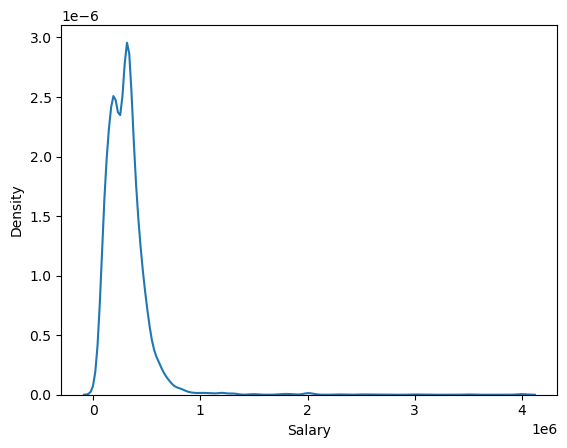

In [26]:
sns.kdeplot(df.Salary)

One salary value appears anomalies, with a skewness of 6.45 in the dataset of 3998 entries.

In [27]:
df['Salary_transformed'] = np.log(df.Salary)

In [28]:
df.Salary_transformed.skew()

-0.09829882462914667

In [29]:
list_2 = find_anomalies(df.Salary_transformed)

In [30]:
len(list_2)

1

In [31]:
len(df)

3998

<Axes: xlabel='Salary_transformed', ylabel='Density'>

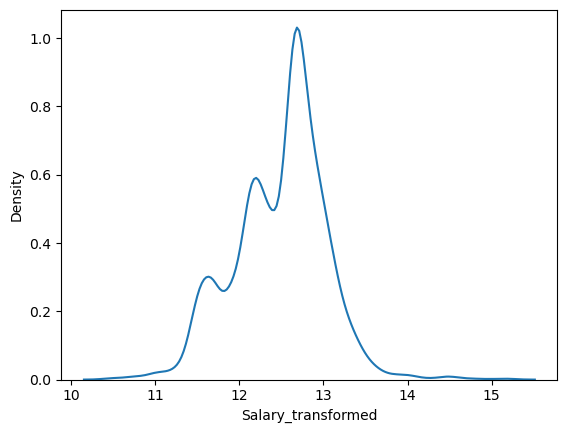

In [32]:
sns.kdeplot(df.Salary_transformed)

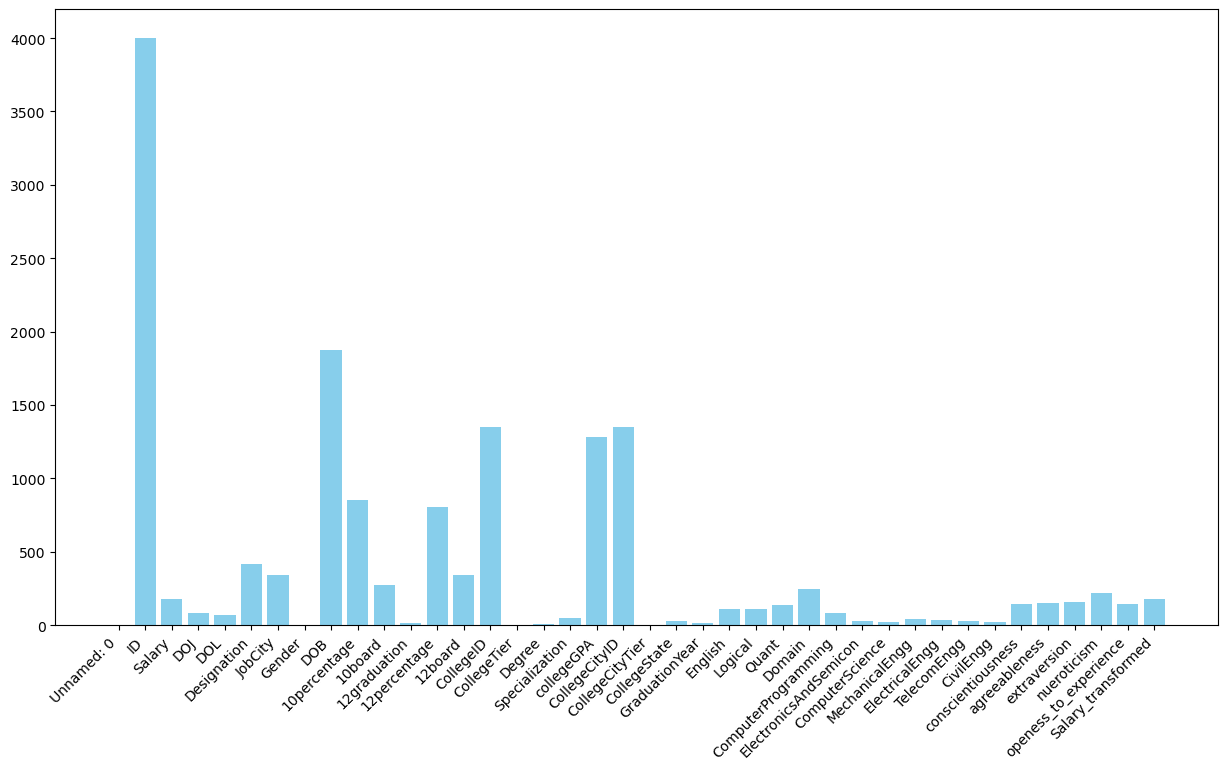

In [33]:
file_path = "data.csv"  
column_value_counts = {}


for column in df.columns:
    column_value_counts[column] = df[column].nunique()


plt.figure(figsize=(15, 8))
plt.bar(column_value_counts.keys(), column_value_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right') 
plt.show()

The bar plot displays the number of unique values for each column in the datase.

# UNIVARIENT

In [34]:
df.describe()

ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-01-20 10:11:35.147574016   
min    1.124400e+04  3.500000e+04            1991-01-06 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-01-10 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-01-11 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-01-07 00:00:00   
max    1.298275e+06  4.000000e+06            2015-01-12 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

       10percentage  12graduation  12percentage     CollegeID  CollegeTier  \
count   3998.000000   3998.000000   3998.000000   3998.000000  3998.000000   
mean      77.925443   2008.087544     74.466366   5156.851426     1.925713   
min       43.000000   1995.000000     40.000000      2.000000     1.000000   
25%       71.680000   2007.000000     66.000000    494.000000     2.000000   
50%       79.150000   2008.000000     74.400000   3879.000000     2.000000   
75%       85.670000   2009.000000     82.600000   8818.000000     2.000000   
max       97.760000   2013.000000     98.700000  18409.000000     2.000000   
std        9.850162      1.653599     10.999933   4802.261482     0.262270   

        collegeGPA  CollegeCityID  ...  MechanicalEngg  ElectricalEngg  \
count  3998.000000    3998.000000  ...     3998.000000     3998.000000   
mean     71.486171    5156.851426  ...       22.974737       16.478739   
min       6.450000       2.000000  ...       -1.000000       -1.000000   
25%      66.407500     494.000000  ...       -1.000000       -1.000000   
50%      71.720000    3879.000000  ...       -1.000000       -1.000000   
75%      76.327500    8818.000000  ...       -1.000000       -1.000000   
max      99.930000   18409.000000  ...      623.000000      676.000000   
std       8.167338    4802.261482  ...       98.123311       87.585634   

       TelecomEngg    CivilEngg  conscientiousness  agreeableness  \
count  3998.000000  3998.000000        3998.000000    3998.000000   
mean     31.851176     2.683842          -0.037831       0.146496   
min      -1.000000    -1.000000          -4.126700      -5.781600   
25%      -1.000000    -1.000000          -0.713525      -0.287100   
50%      -1.000000    -1.000000           0.046400       0.212400   
75%      -1.000000    -1.000000           0.702700       0.812800   
max     548.000000   516.000000           1.995300       1.904800   
std     104.852845    36.658505           1.028666       0.941782   

       extraversion  nueroticism  openess_to_experience  Salary_transformed  
count   3998.000000  3998.000000            3998.000000         3998.000000  
mean       0.002763    -0.169033              -0.138110           12.486496  
min       -4.600900    -2.643000              -7.375700           10.463103  
25%       -0.604800    -0.868200              -0.669200           12.100712  
50%        0.091400    -0.234400              -0.094300           12.611538  
75%        0.672000     0.526200               0.502400           12.821258  
max        2.535400     3.352500               1.822400           15.201805  
std        0.951471     1.007580               1.008075            0.543647  

[8 rows x 29 columns]

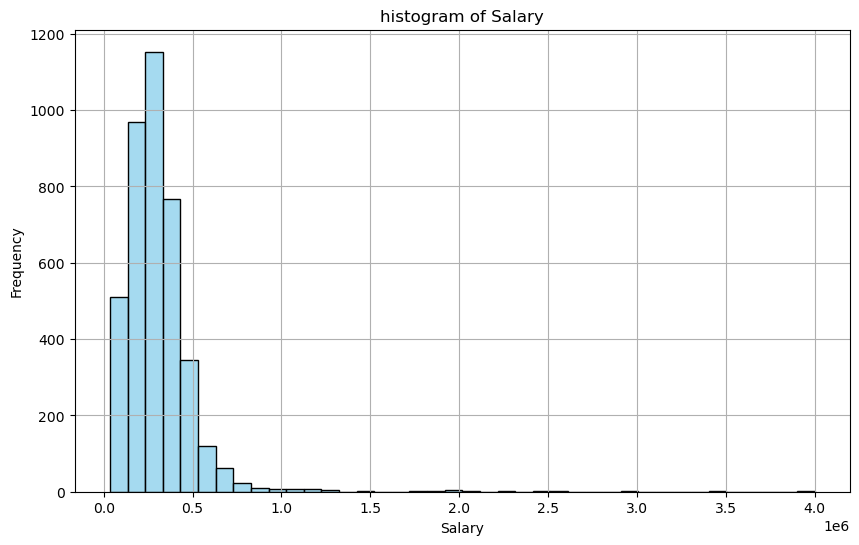

Mean Salary: 307699.8499249625
Median Salary: 300000.0
Standard Deviation of Salary: 212737.4999568574
Minimum Salary: 35000.0
Maximum Salary: 4000000.0


In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=40, color='skyblue', edgecolor='black')
plt.title('histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
std_dev_salary = df['Salary'].std()
min_salary = df['Salary'].min()
max_salary = df['Salary'].max()



print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Standard Deviation of Salary:", std_dev_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)

The salary distribution is right-skewed with a mean of 307,699.85, a median of 300,000.00, a standard deviation of 212,737.50, and salaries ranging from 35,000.00 to 4,000,000.00.

In [36]:
new_df1_traget0=df[df["Salary"]==0]
new_df1_traget1=df[df["Salary"]==1]

In [37]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_contex('talk')
    plt.rcparams["axes.labelsize"] = 19
    plt.rcparams["axes.titlesize"] = 21
    plt.rcparams["axes.titlepad"] = 29
    
    temp = pd.series(df = hue)
    fig, ax = plt.subplot()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df , x= col, order=df[col].value_count().index,hue = hue,palette='bright')
    
    plt.show()

In [38]:
df.select_dtypes(include="number")

ID     Salary  10percentage  12graduation  12percentage  CollegeID  \
0     203097   420000.0         84.30          2007         95.80       1141   
1     579905   500000.0         85.40          2007         85.00       5807   
2     810601   325000.0         85.00          2010         68.20         64   
3     267447  1100000.0         85.60          2007         83.60       6920   
4     343523   200000.0         78.00          2008         76.80      11368   
...      ...        ...           ...           ...           ...        ...   
3993   47916   280000.0         52.09          2006         55.50       6268   
3994  752781   100000.0         90.00          2009         93.00       4883   
3995  355888   320000.0         81.86          2008         65.50       9786   
3996  947111   200000.0         78.72          2010         69.88        979   
3997  324966   400000.0         70.60          2008         68.00       6609   

      CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  ...  \
0               2       78.00           1141                0  ...   
1               2       70.06           5807                0  ...   
2               2       70.00             64                0  ...   
3               1       74.64           6920                1  ...   
4               2       73.90          11368                0  ...   
...           ...         ...            ...              ...  ...   
3993            2       61.50           6268                0  ...   
3994            2       77.30           4883                1  ...   
3995            2       70.00           9786                0  ...   
3996            2       70.42            979                1  ...   
3997            2       68.00           6609                1  ...   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                 -1              -1           -1         -1   
1                 -1              -1           -1         -1   
2                 -1              -1           -1         -1   
3                 -1              -1           -1         -1   
4                 -1              -1           -1         -1   
...              ...             ...          ...        ...   
3993              -1              -1           -1         -1   
3994              -1              -1           -1         -1   
3995              -1              -1           -1         -1   
3996              -1              -1           -1         -1   
3997              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                0.9737         0.8128        0.5269      1.35490   
1               -0.7335         0.3789        1.2396     -0.10760   
2                0.2718         1.7109        0.1637     -0.86820   
3                0.0464         0.3448       -0.3440     -0.40780   
4               -0.8810        -0.2793       -1.0697      0.09163   
...                 ...            ...           ...          ...   
3993            -0.1082         0.3448        0.2366      0.64980   
3994            -0.3027         0.8784        0.9322      0.77980   
3995            -1.5765        -1.5273       -1.5051     -1.31840   
3996            -0.1590         0.0459       -0.4511     -0.36120   
3997            -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  Salary_transformed  
0                   -0.4455           12.948010  
1                    0.8637           13.122363  
2                    0.6721           12.691580  
3                   -0.9194           13.910821  
4                   -0.1295           12.206073  
...                     ...                 ...  
3993                -0.9194           12.542545  
3994                -0.0943           11.512925  
3995                -0.7615           12.676076  
3996                -0.0943           12.206073  
3997                -0.6035           12.899220  

[3998 row

# BIVARIENT

# scatter plot

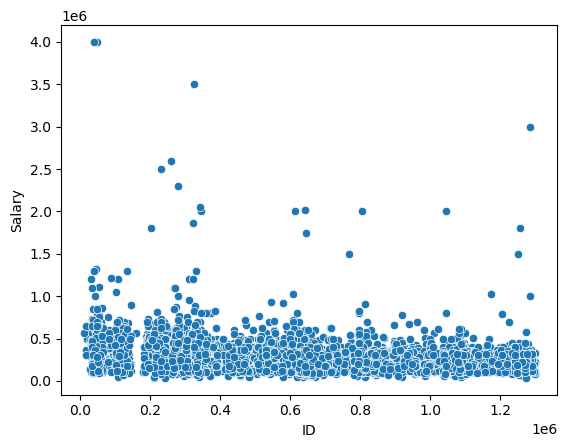

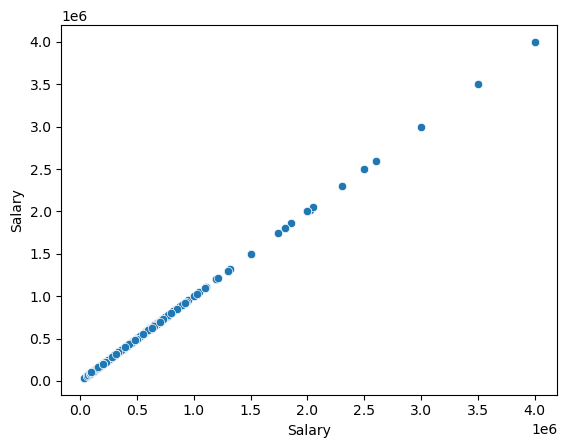

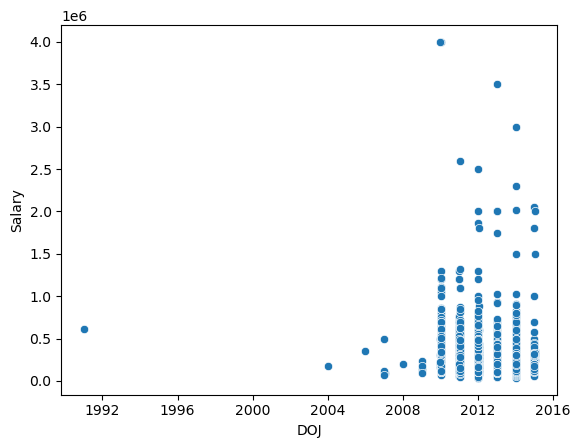

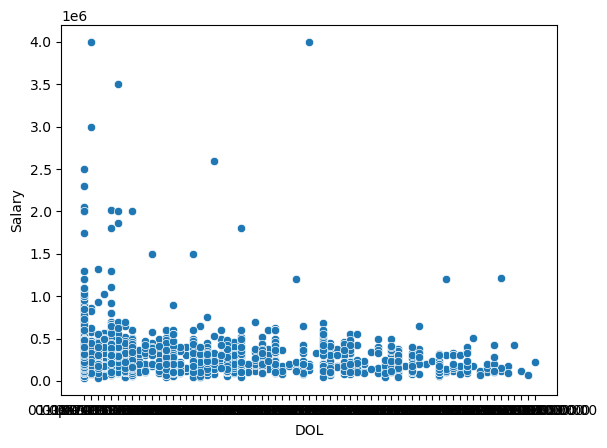

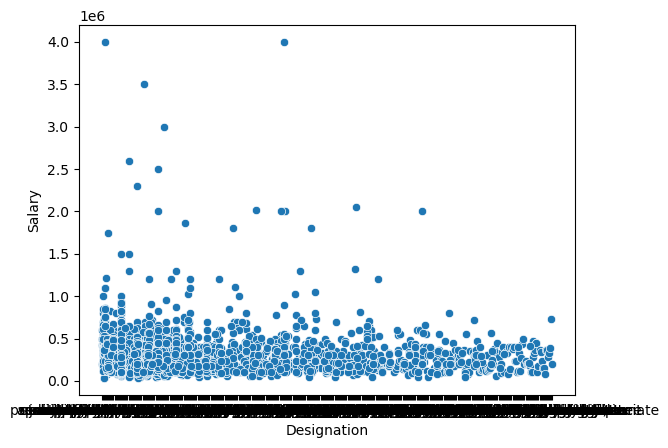

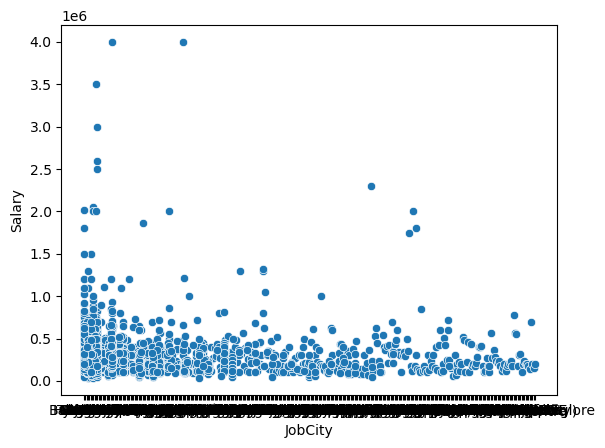

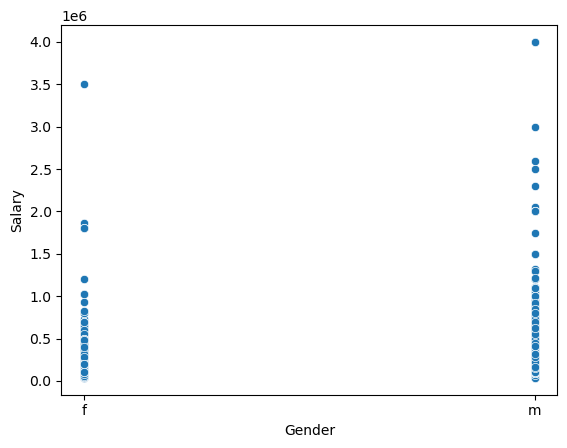

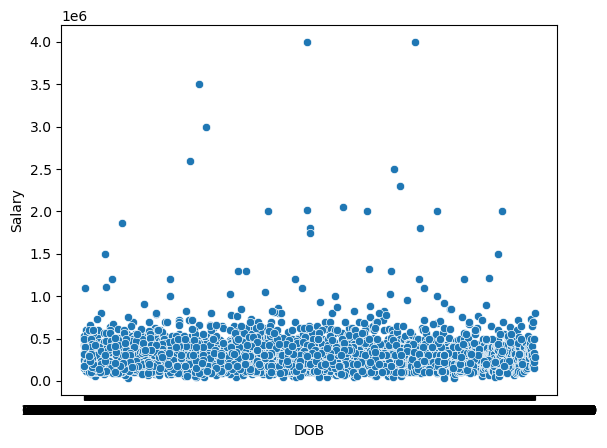

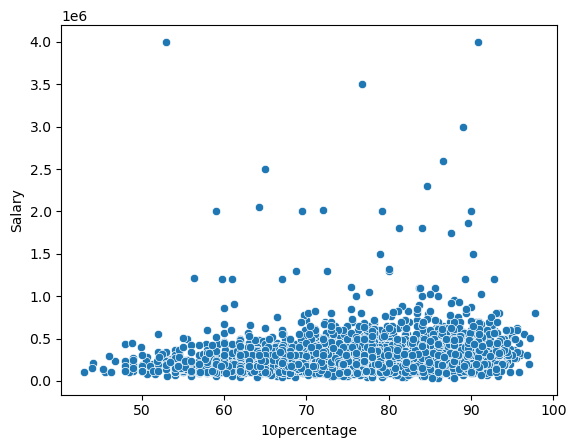

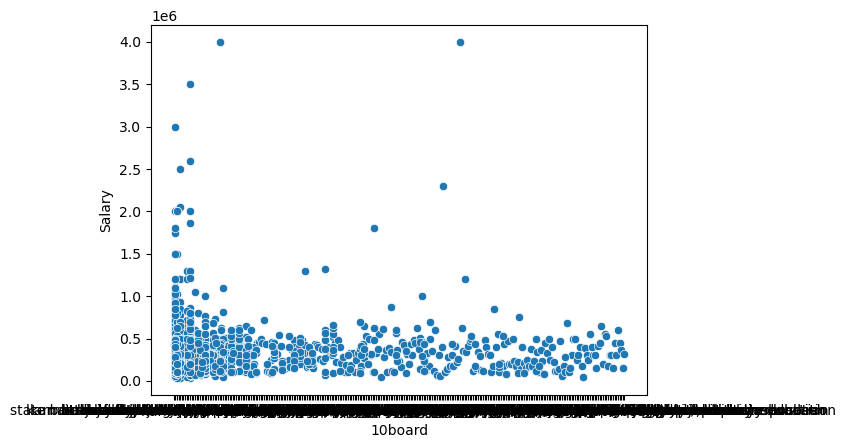

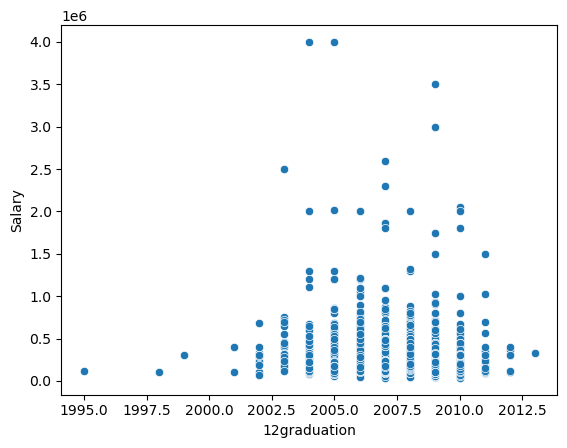

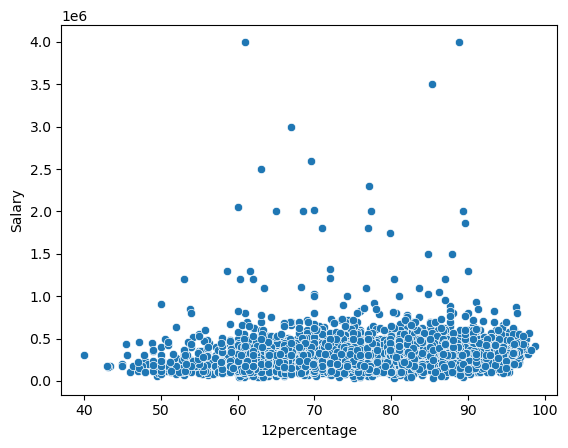

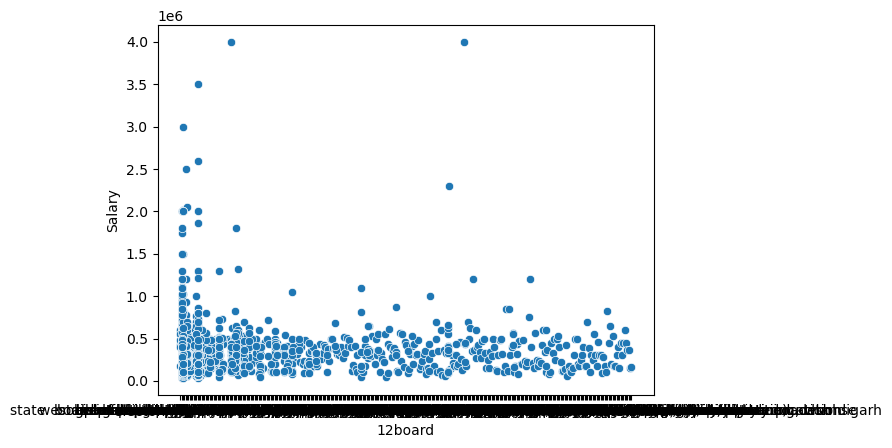

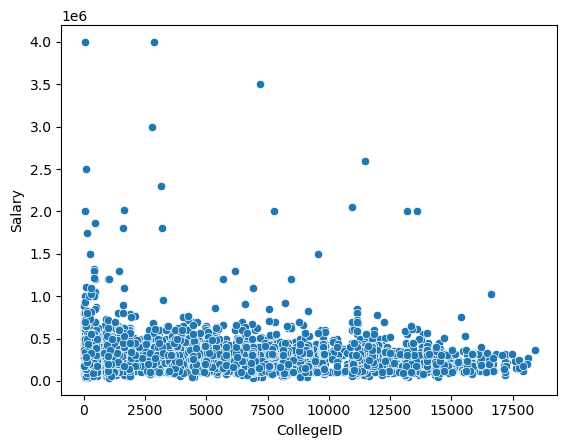

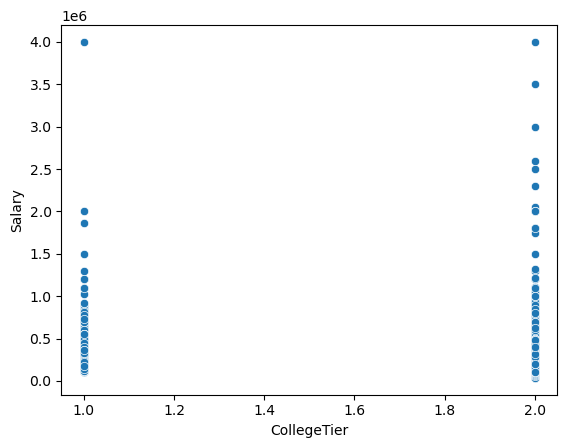

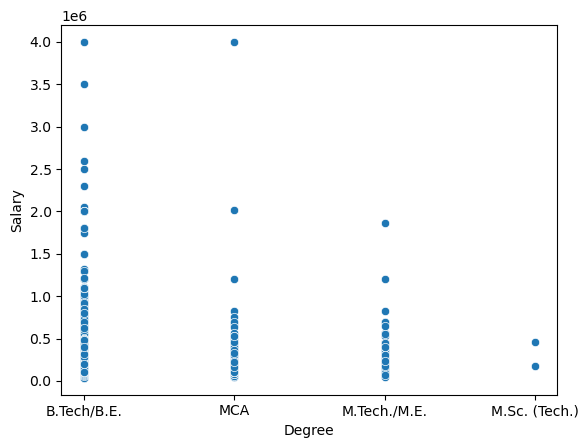

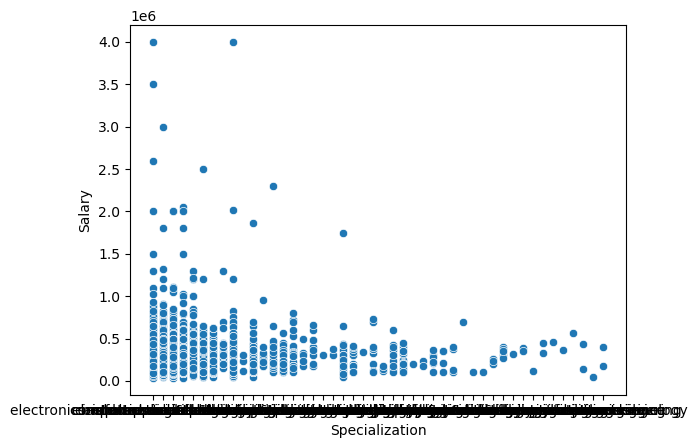

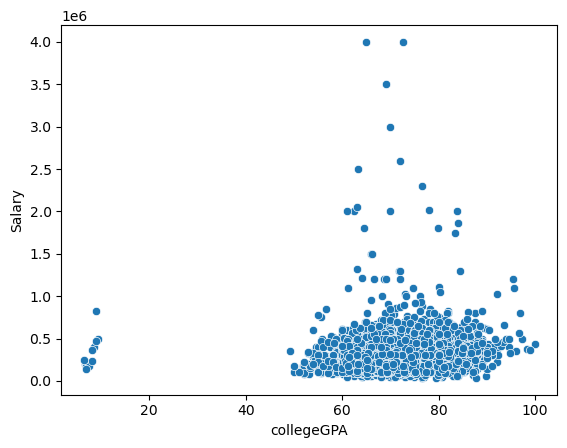

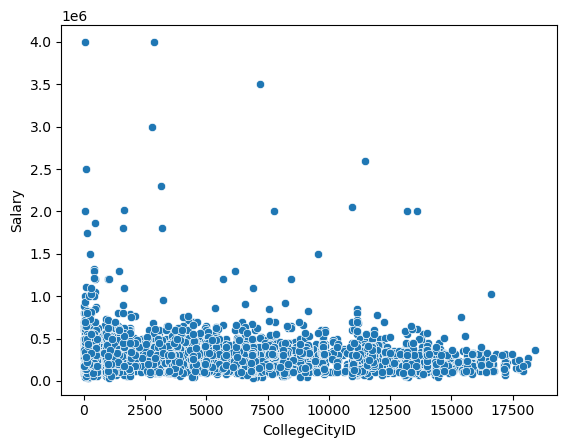

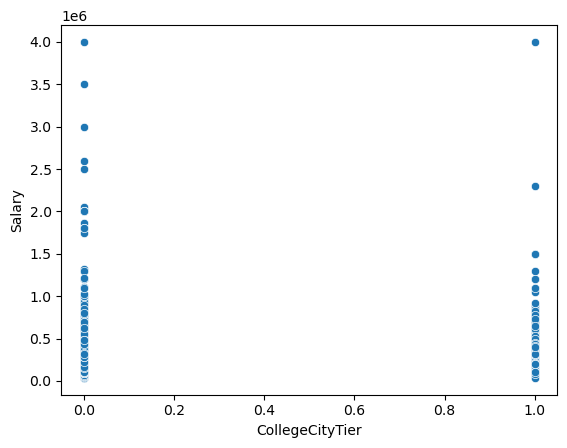

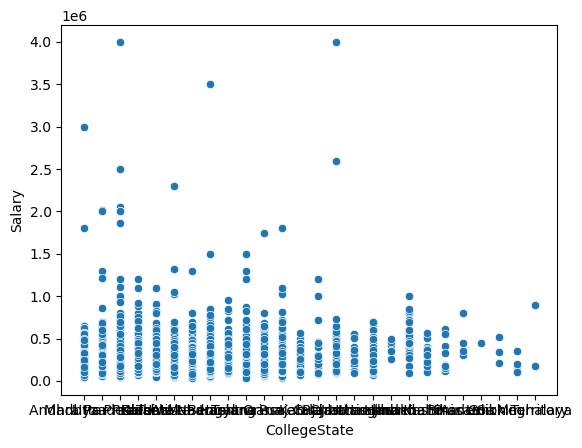

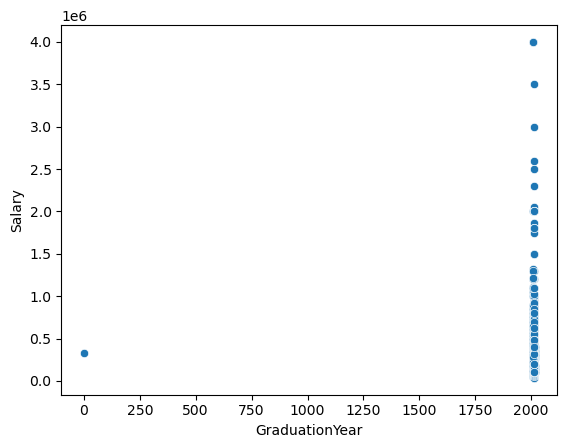

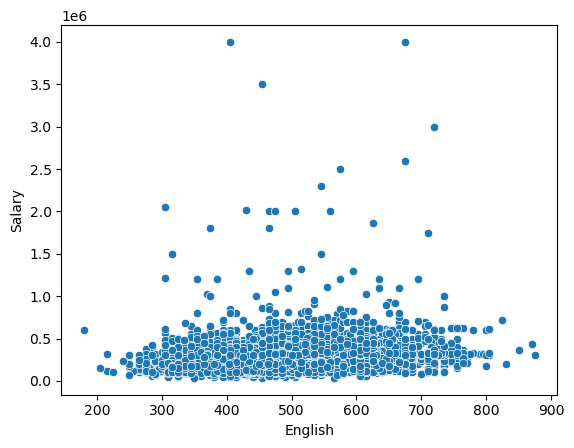

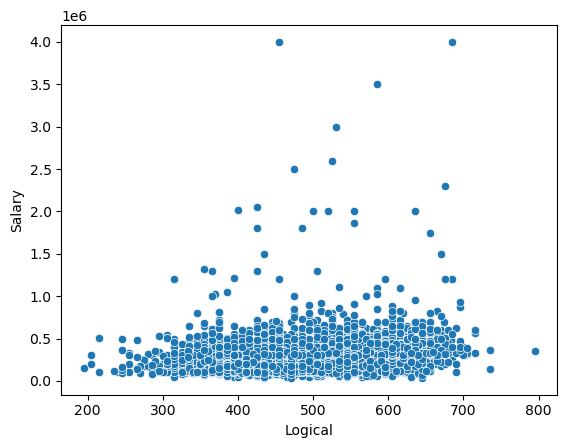

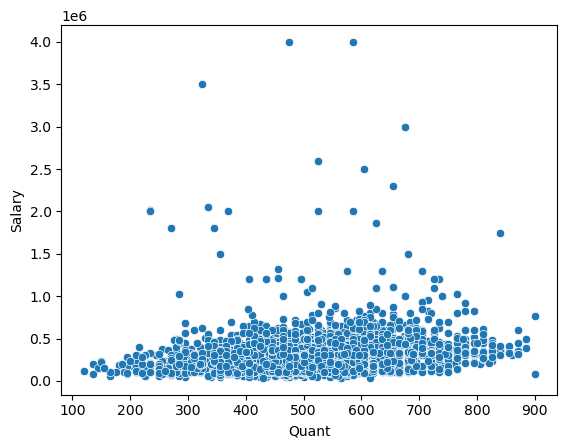

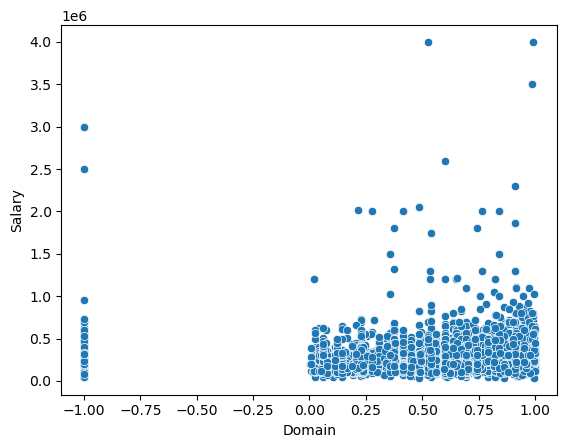

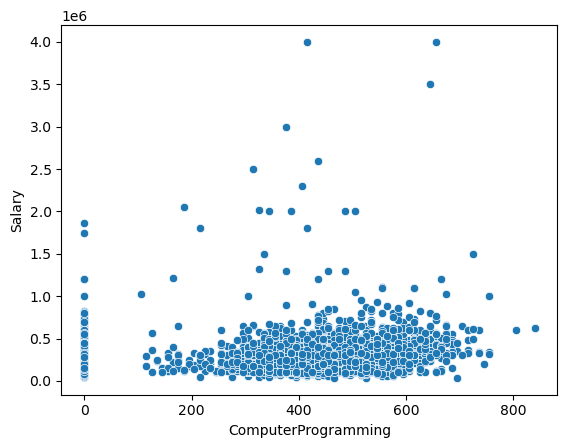

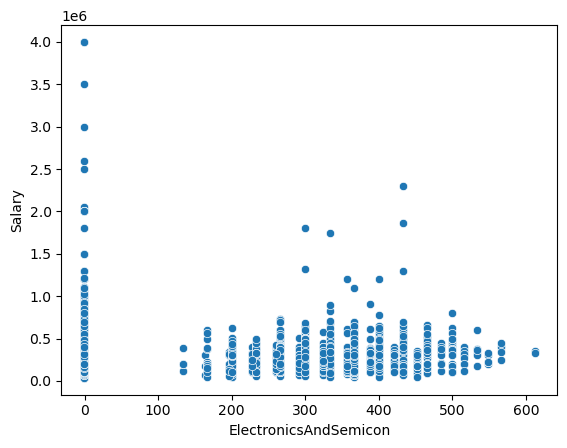

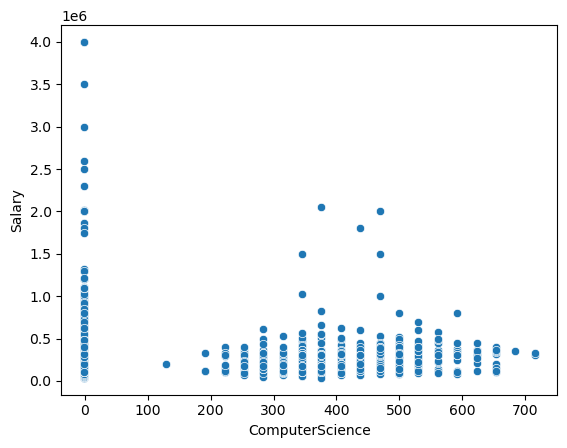

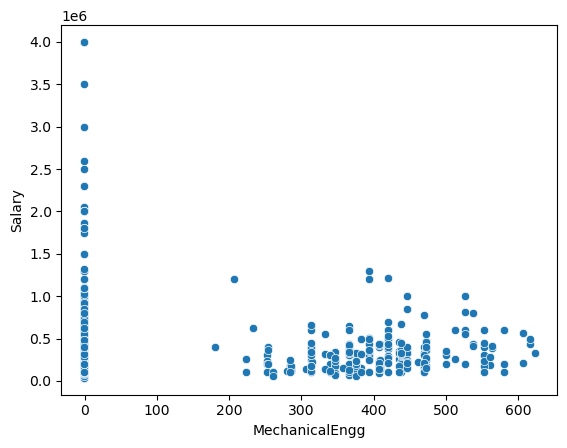

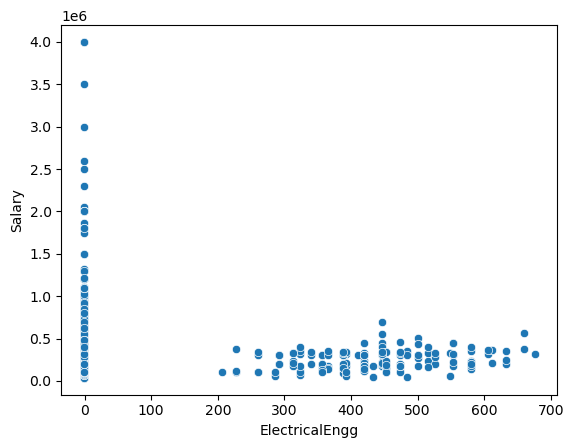

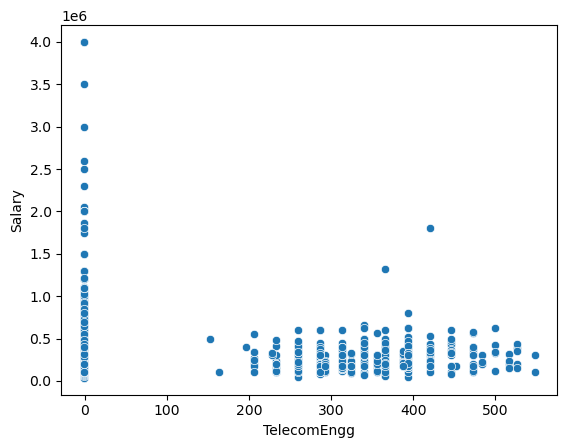

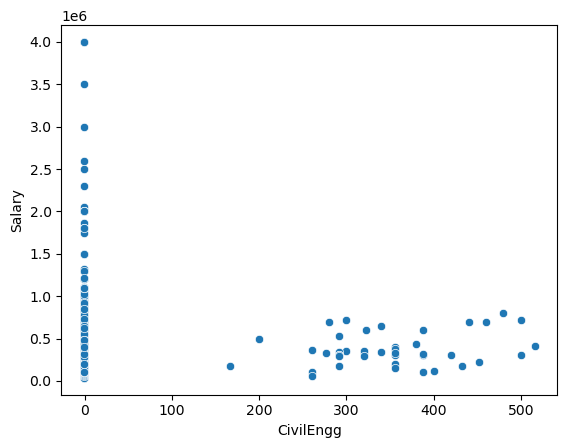

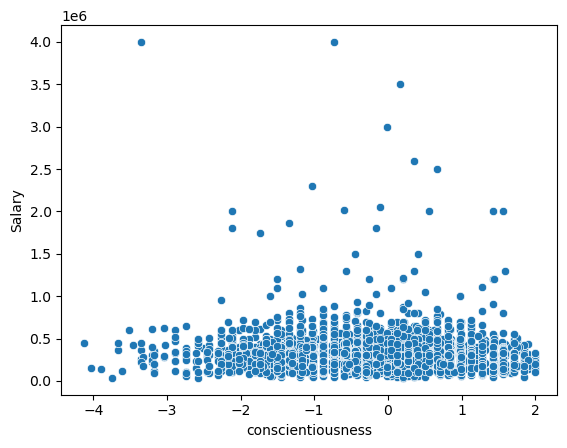

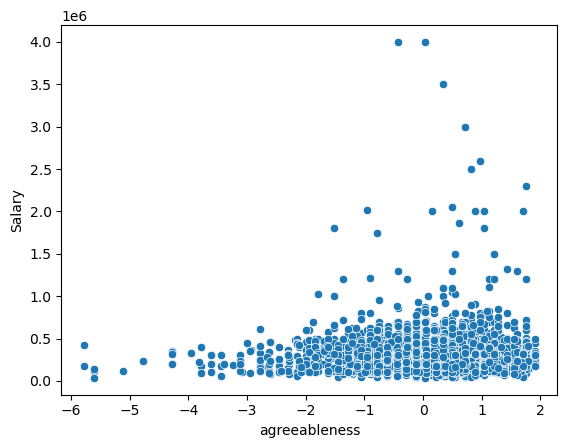

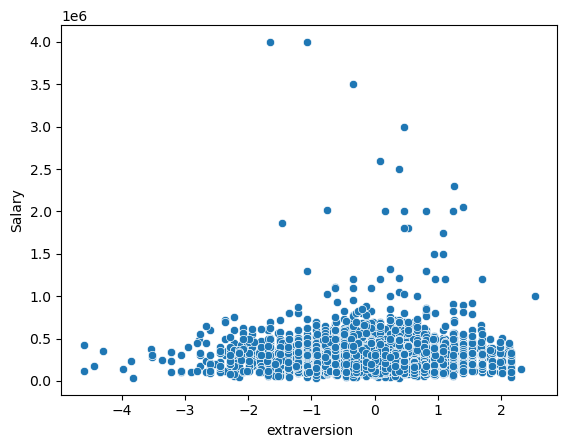

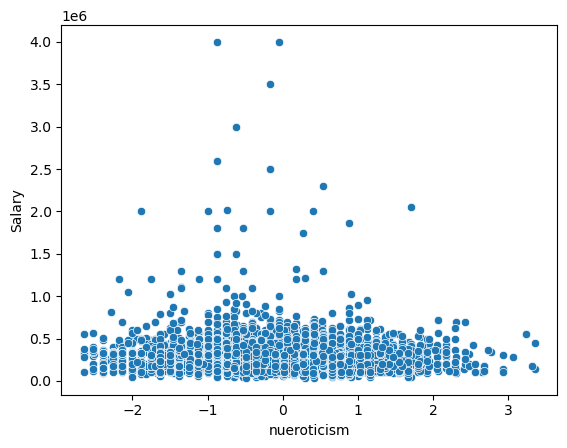

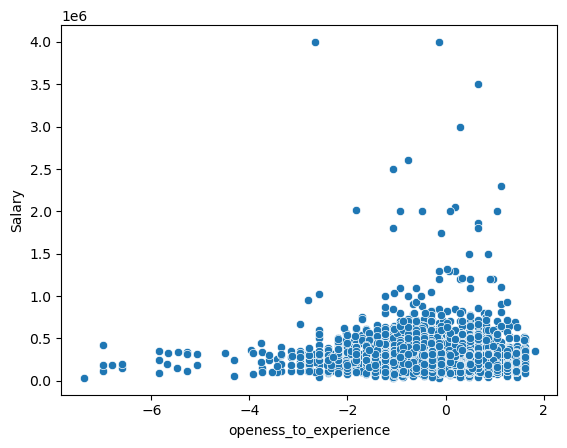

In [39]:
for i in [ 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']: 
    sns.scatterplot(data=df, x=i, y='Salary')
    plt.show()

# BOX PLOT

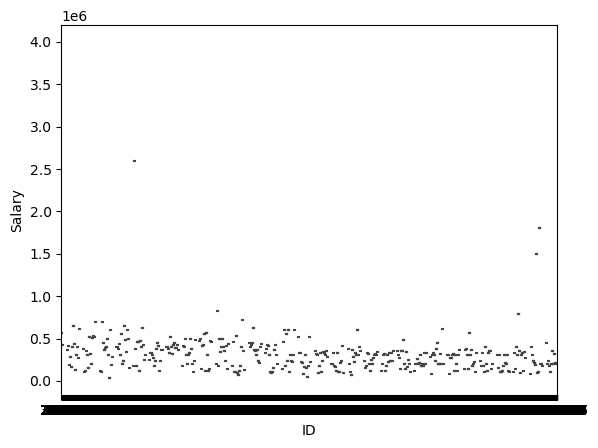

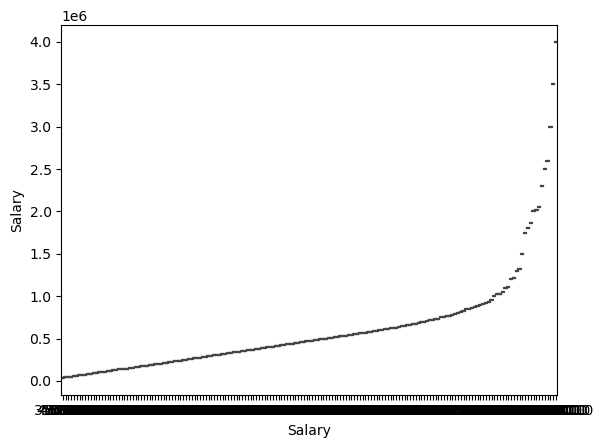

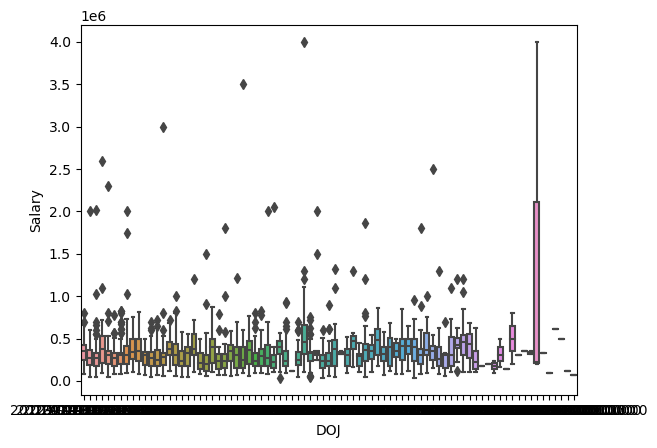

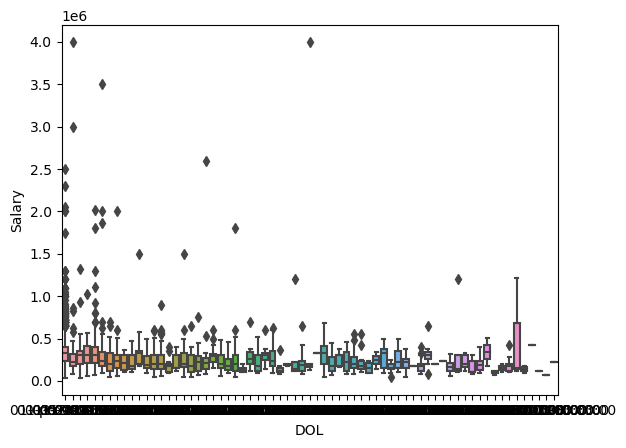

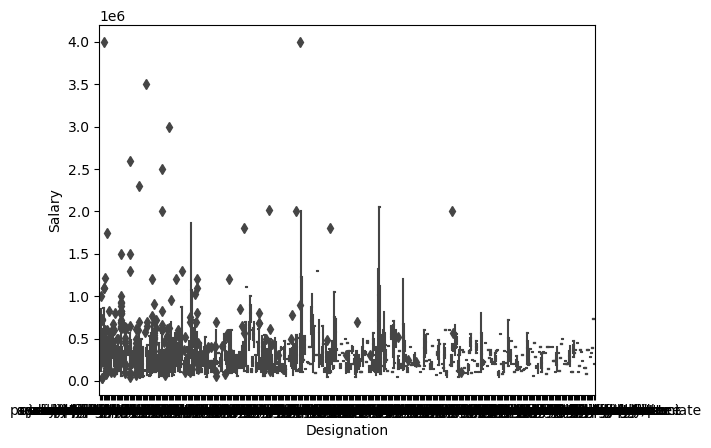

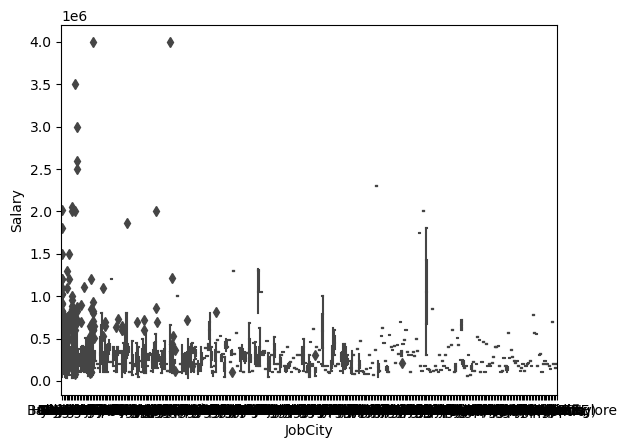

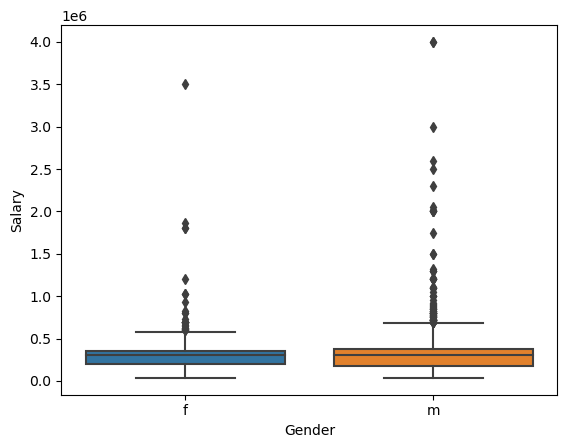

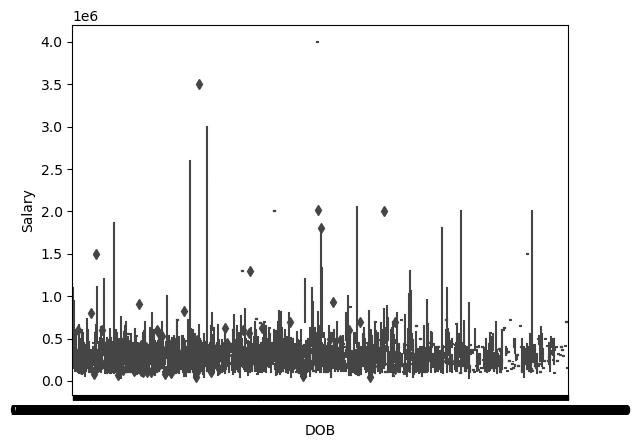

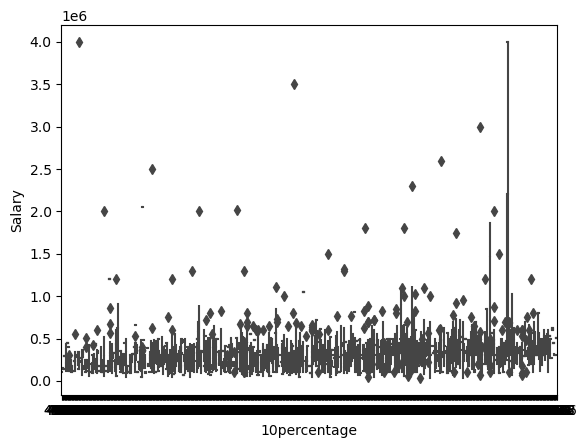

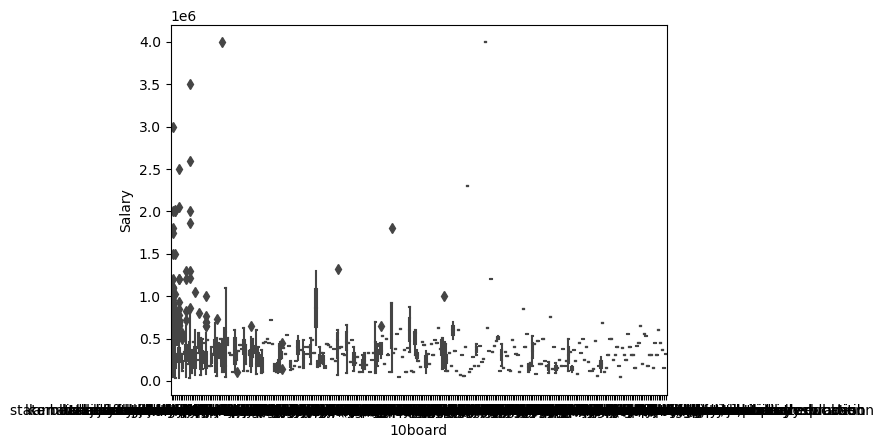

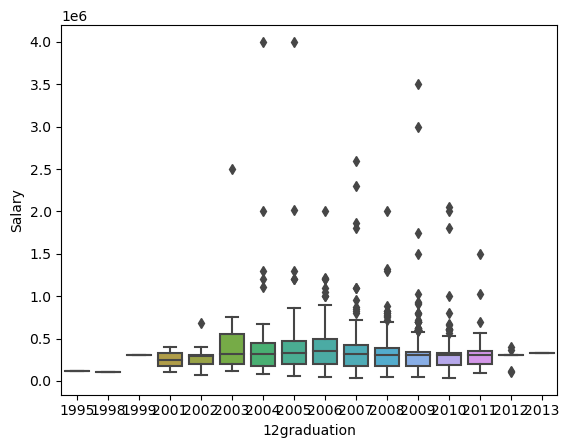

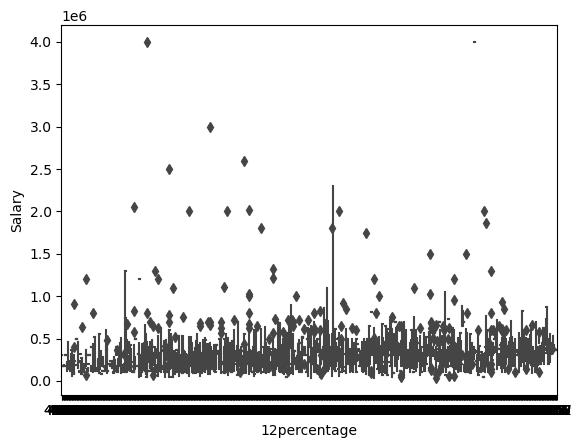

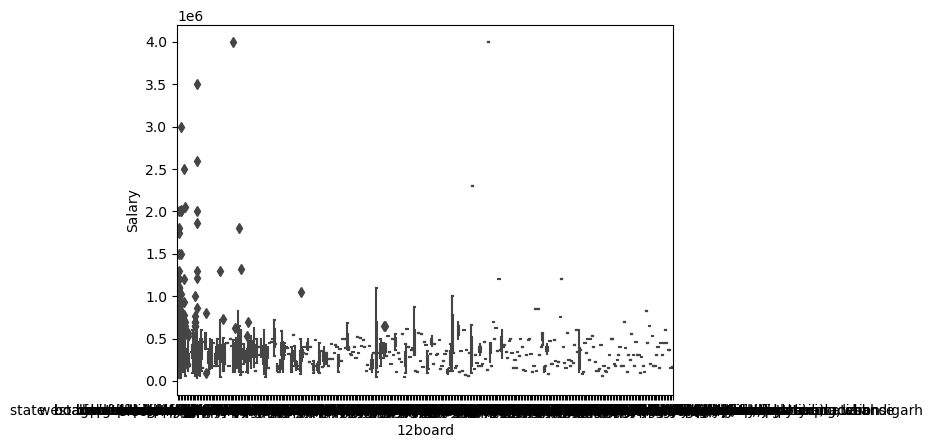

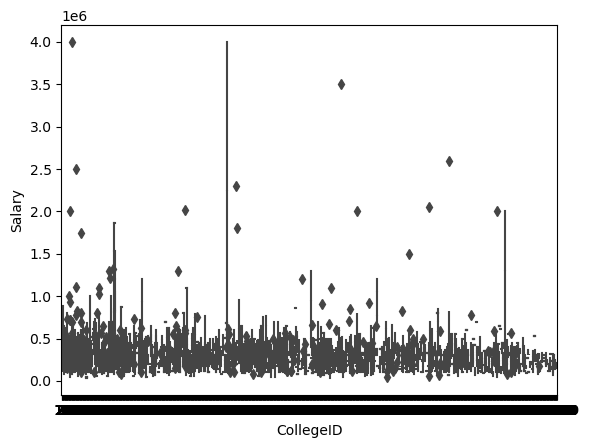

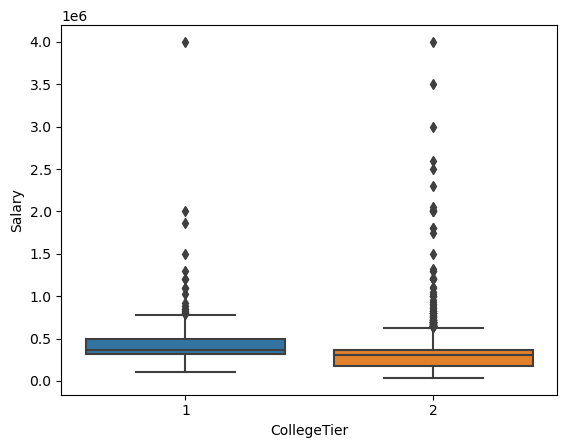

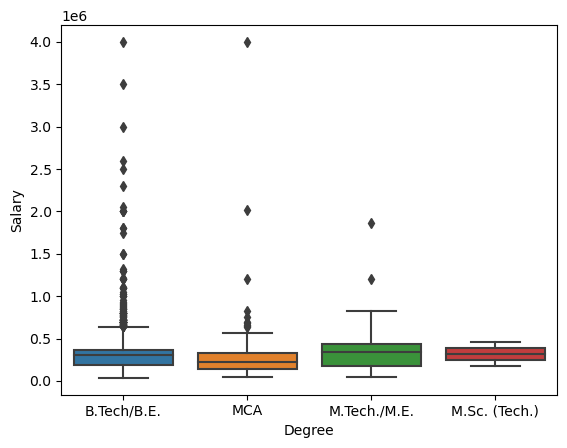

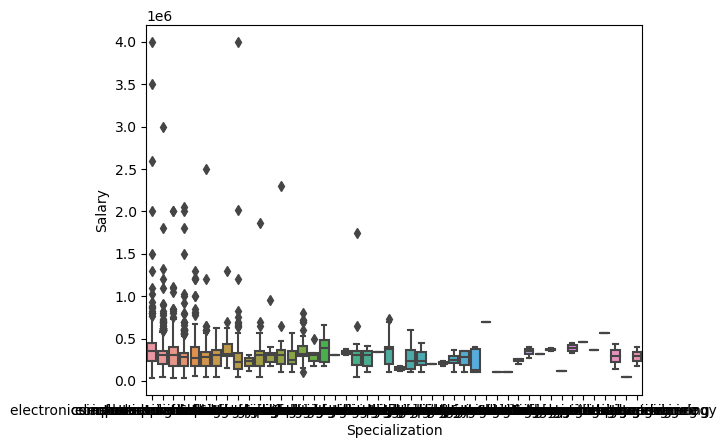

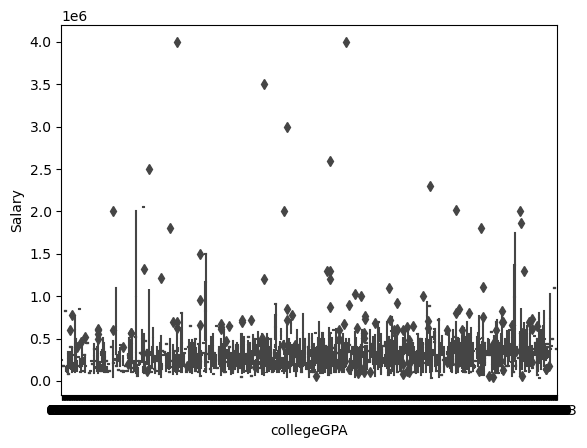

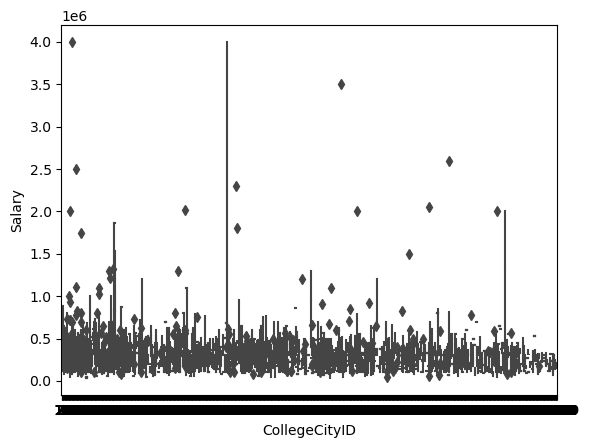

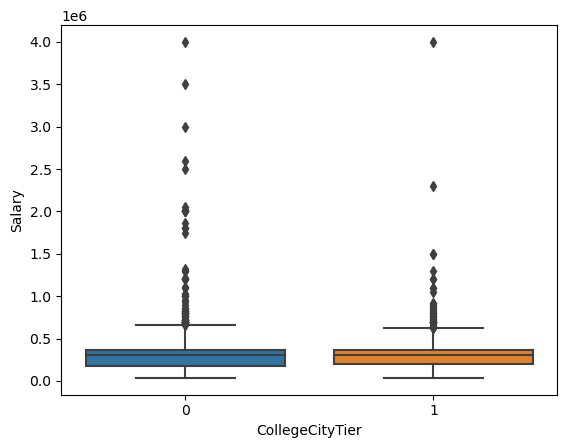

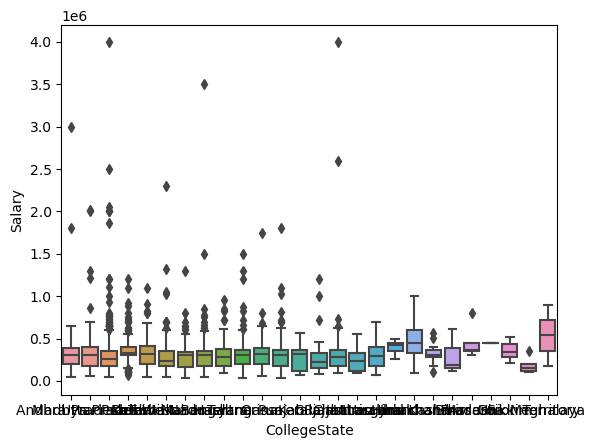

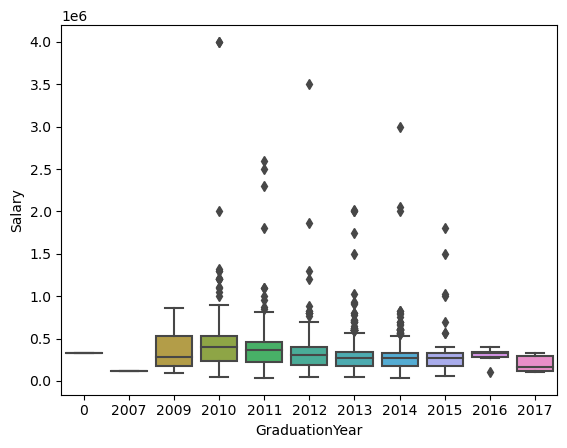

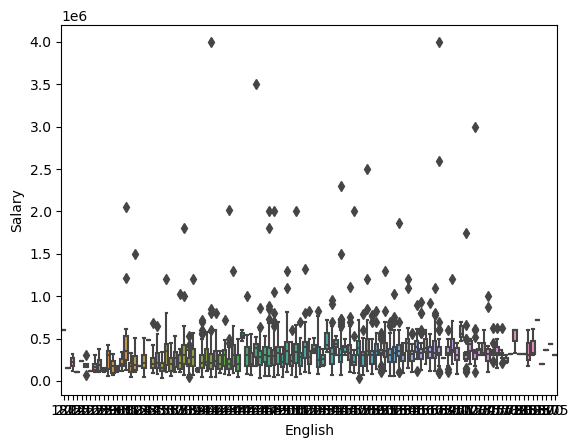

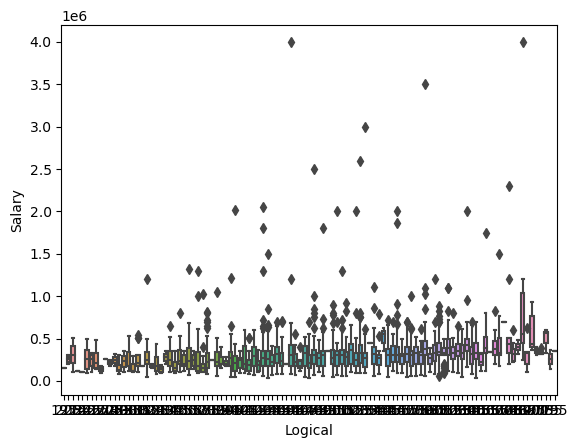

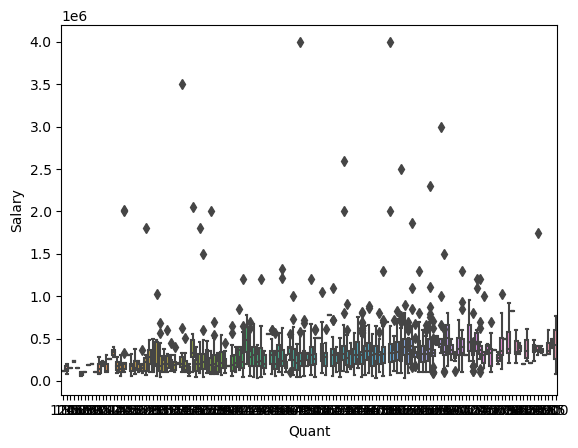

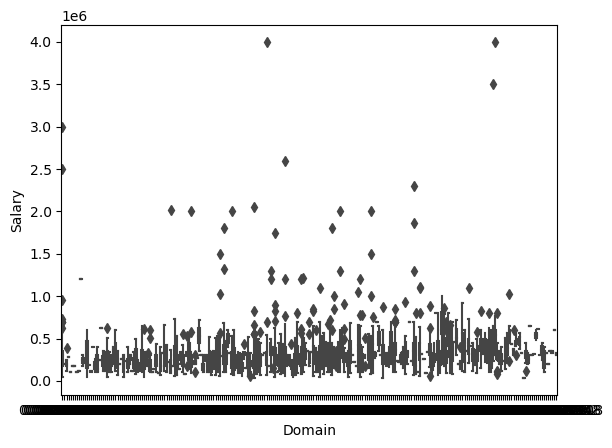

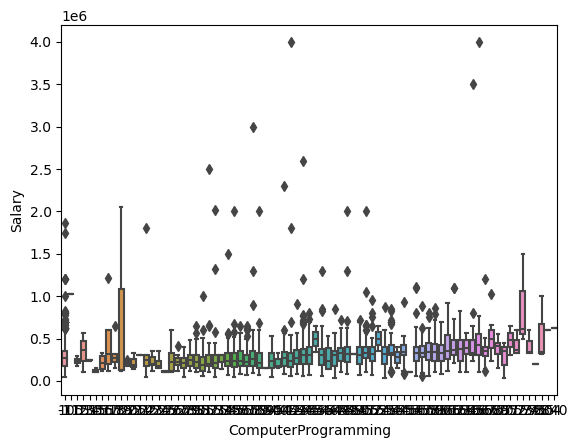

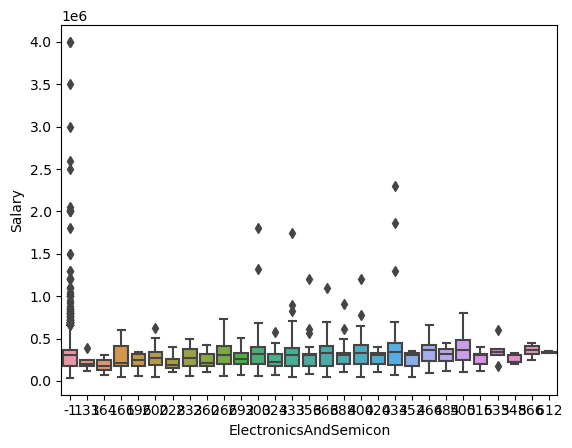

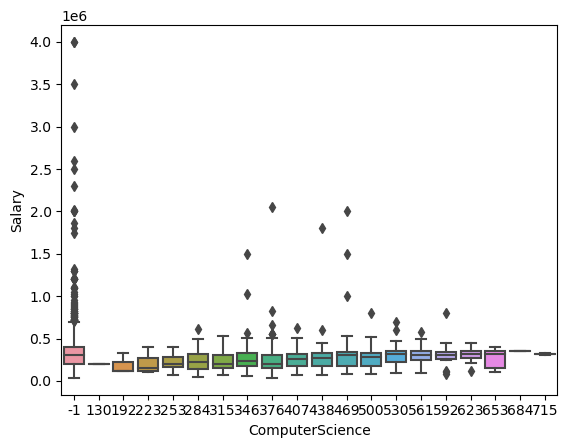

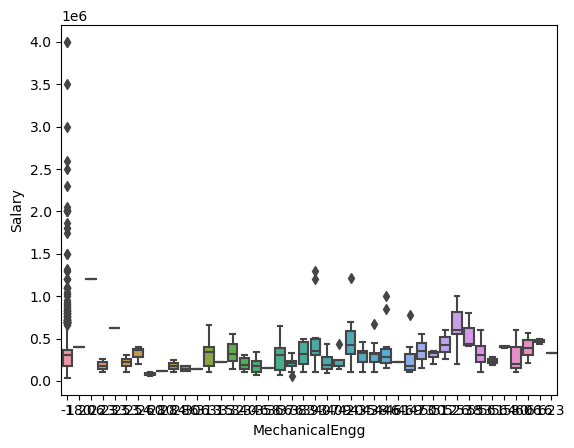

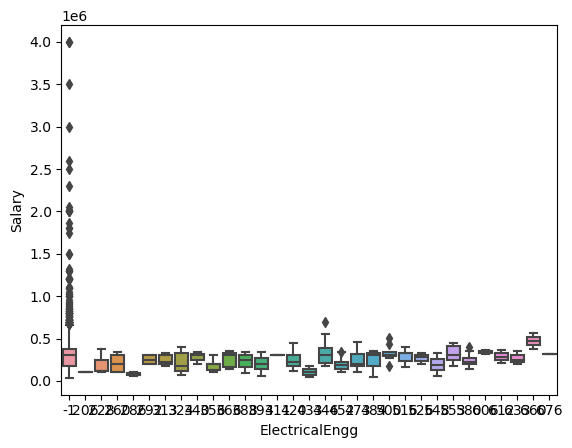

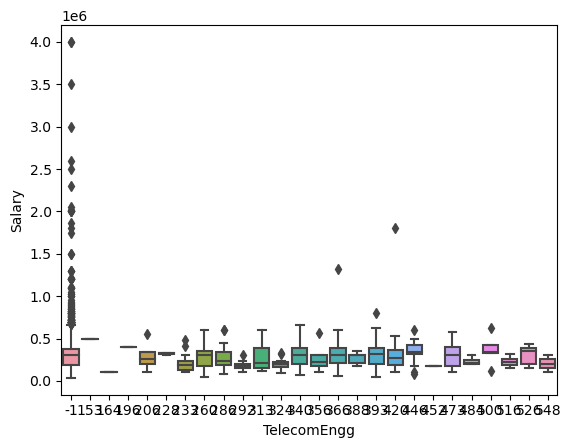

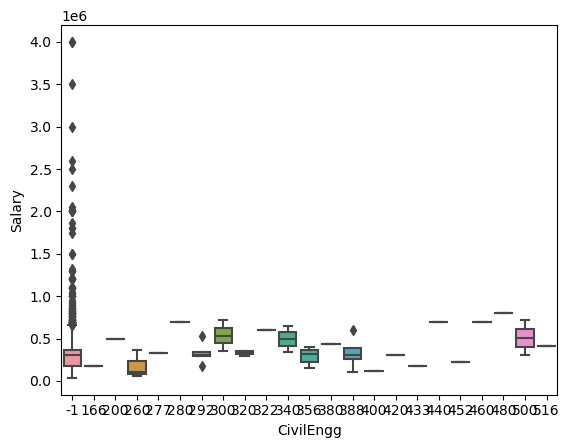

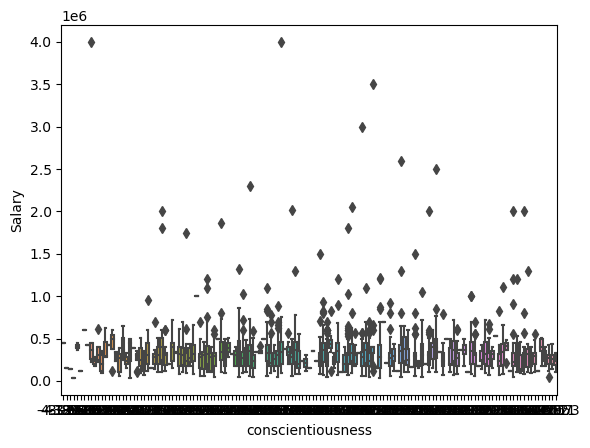

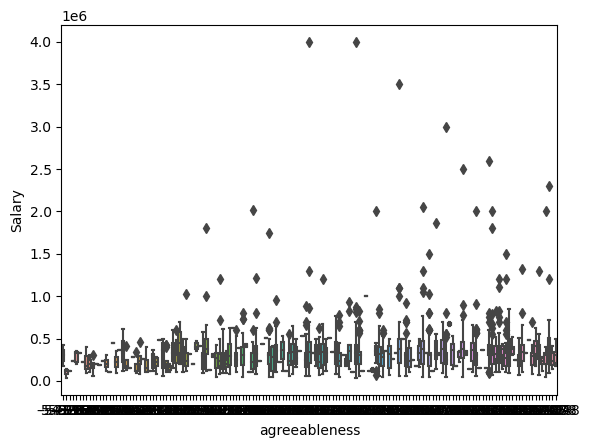

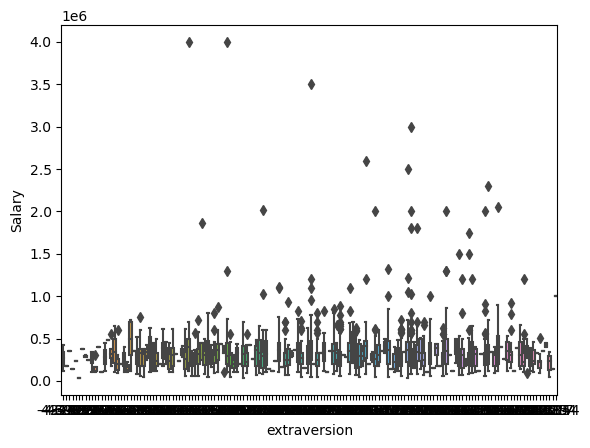

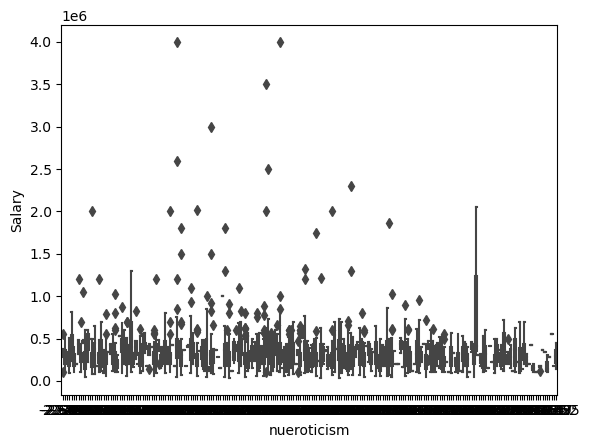

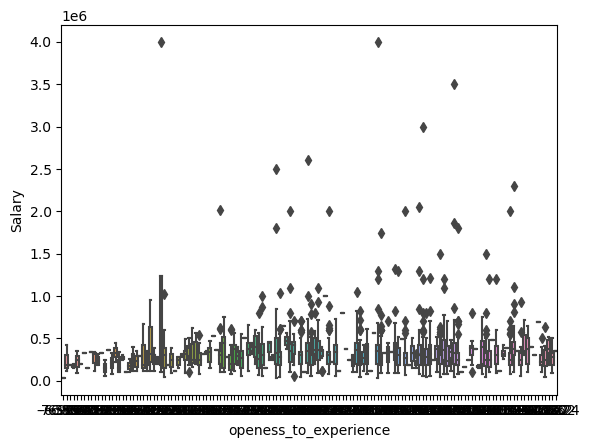

In [40]:
for i in  [ 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']:
    sns.boxplot(data=df,x=i,y='Salary')
    plt.show()

In [45]:
df.select_dtypes(include="number").corr()

ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.247294      0.044547      0.673102   
Salary                -0.247294  1.000000      0.177373     -0.161383   
10percentage           0.044547  0.177373      1.000000      0.269957   
12graduation           0.673102 -0.161383      0.269957      1.000000   
12percentage           0.007069  0.170254      0.643378      0.259166   
CollegeID              0.284540 -0.118690      0.021082      0.254021   
CollegeTier            0.035160 -0.179332     -0.126042      0.027691   
collegeGPA             0.047144  0.130103      0.312538      0.086001   
CollegeCityID          0.284540 -0.118690      0.021082      0.254021   
CollegeCityTier       -0.035977  0.015384      0.116707     -0.003016   
GraduationYear         0.027539 -0.010053     -0.013799      0.014457   
English                0.135505  0.178219      0.350780      0.147925   
Logical                0.102215  0.179275      0.316014      0.105887   
Quant                 -0.055134  0.230627      0.317640      0.001379   
Domain                -0.125639  0.104656      0.078563     -0.034163   
ComputerProgramming    0.018859  0.115665      0.053600     -0.047995   
ElectronicsAndSemicon -0.115601  0.000665      0.085179     -0.005891   
ComputerScience        0.482626 -0.100720     -0.018933      0.293439   
MechanicalEngg        -0.026147  0.018475      0.050364      0.035459   
ElectricalEngg         0.104454 -0.047598      0.074419      0.123751   
TelecomEngg           -0.049272 -0.022691      0.049378      0.023470   
CivilEngg             -0.017871  0.037639      0.030002     -0.004727   
conscientiousness      0.175557 -0.064148      0.067657      0.103329   
agreeableness          0.024837  0.057423      0.136645      0.041182   
extraversion           0.120979 -0.010213     -0.004679      0.061956   
nueroticism           -0.146289 -0.054685     -0.132496     -0.074369   
openess_to_experience  0.031359 -0.011312      0.036692     -0.015069   
Salary_transformed    -0.267052  0.827122      0.268979     -0.133422   

                       12percentage  CollegeID  CollegeTier  collegeGPA  \
ID                         0.007069   0.284540     0.035160    0.047144   
Salary                     0.170254  -0.118690    -0.179332    0.130103   
10percentage               0.643378   0.021082    -0.126042    0.312538   
12graduation               0.259166   0.254021     0.027691    0.086001   
12percentage               1.000000   0.022336    -0.100771    0.346137   
CollegeID                  0.022336   1.000000     0.067054    0.017240   
CollegeTier               -0.100771   0.067054     1.000000   -0.086781   
collegeGPA                 0.346137   0.017240    -0.086781    1.000000   
CollegeCityID              0.022336   1.000000     0.067054    0.017240   
CollegeCityTier            0.130462   0.007757    -0.101494    0.017471   
GraduationYear            -0.012933  -0.000172    -0.005557    0.008706   
English                    0.212888  -0.022792    -0.183843    0.106478   
Logical                    0.243571  -0.047094    -0.182811    0.196610   
Quant                      0.312413  -0.114672    -0.251103    0.217380   
Domain                     0.074099  -0.073857    -0.061436    0.107252   
ComputerProgramming        0.080818  -0.033760    -0.073644    0.136596   
ElectronicsAndSemicon      0.117112  -0.020438    -0.031573    0.029855   
ComputerScience           -0.043534   0.102303     0.001053    0.007601   
MechanicalEngg             0.037635  -0.009291    -0.021548   -0.031765   
ElectricalEngg             0.064001   0.022933     0.002594    0.052258   
TelecomEngg                0.044201   0.025620     0.000007   -0.005226   
CivilEngg                  0.005910   0.005749    -0.033722   -0.018950   
conscientiousness          0.058299   0.076432     0.055174    0.069582   
agreeableness              0.103998  -0.005264    -0.038055    0.068282   
extraversion              -0.007486 

In [46]:
s=df.select_dtypes(include="number").corr()

<Axes: >

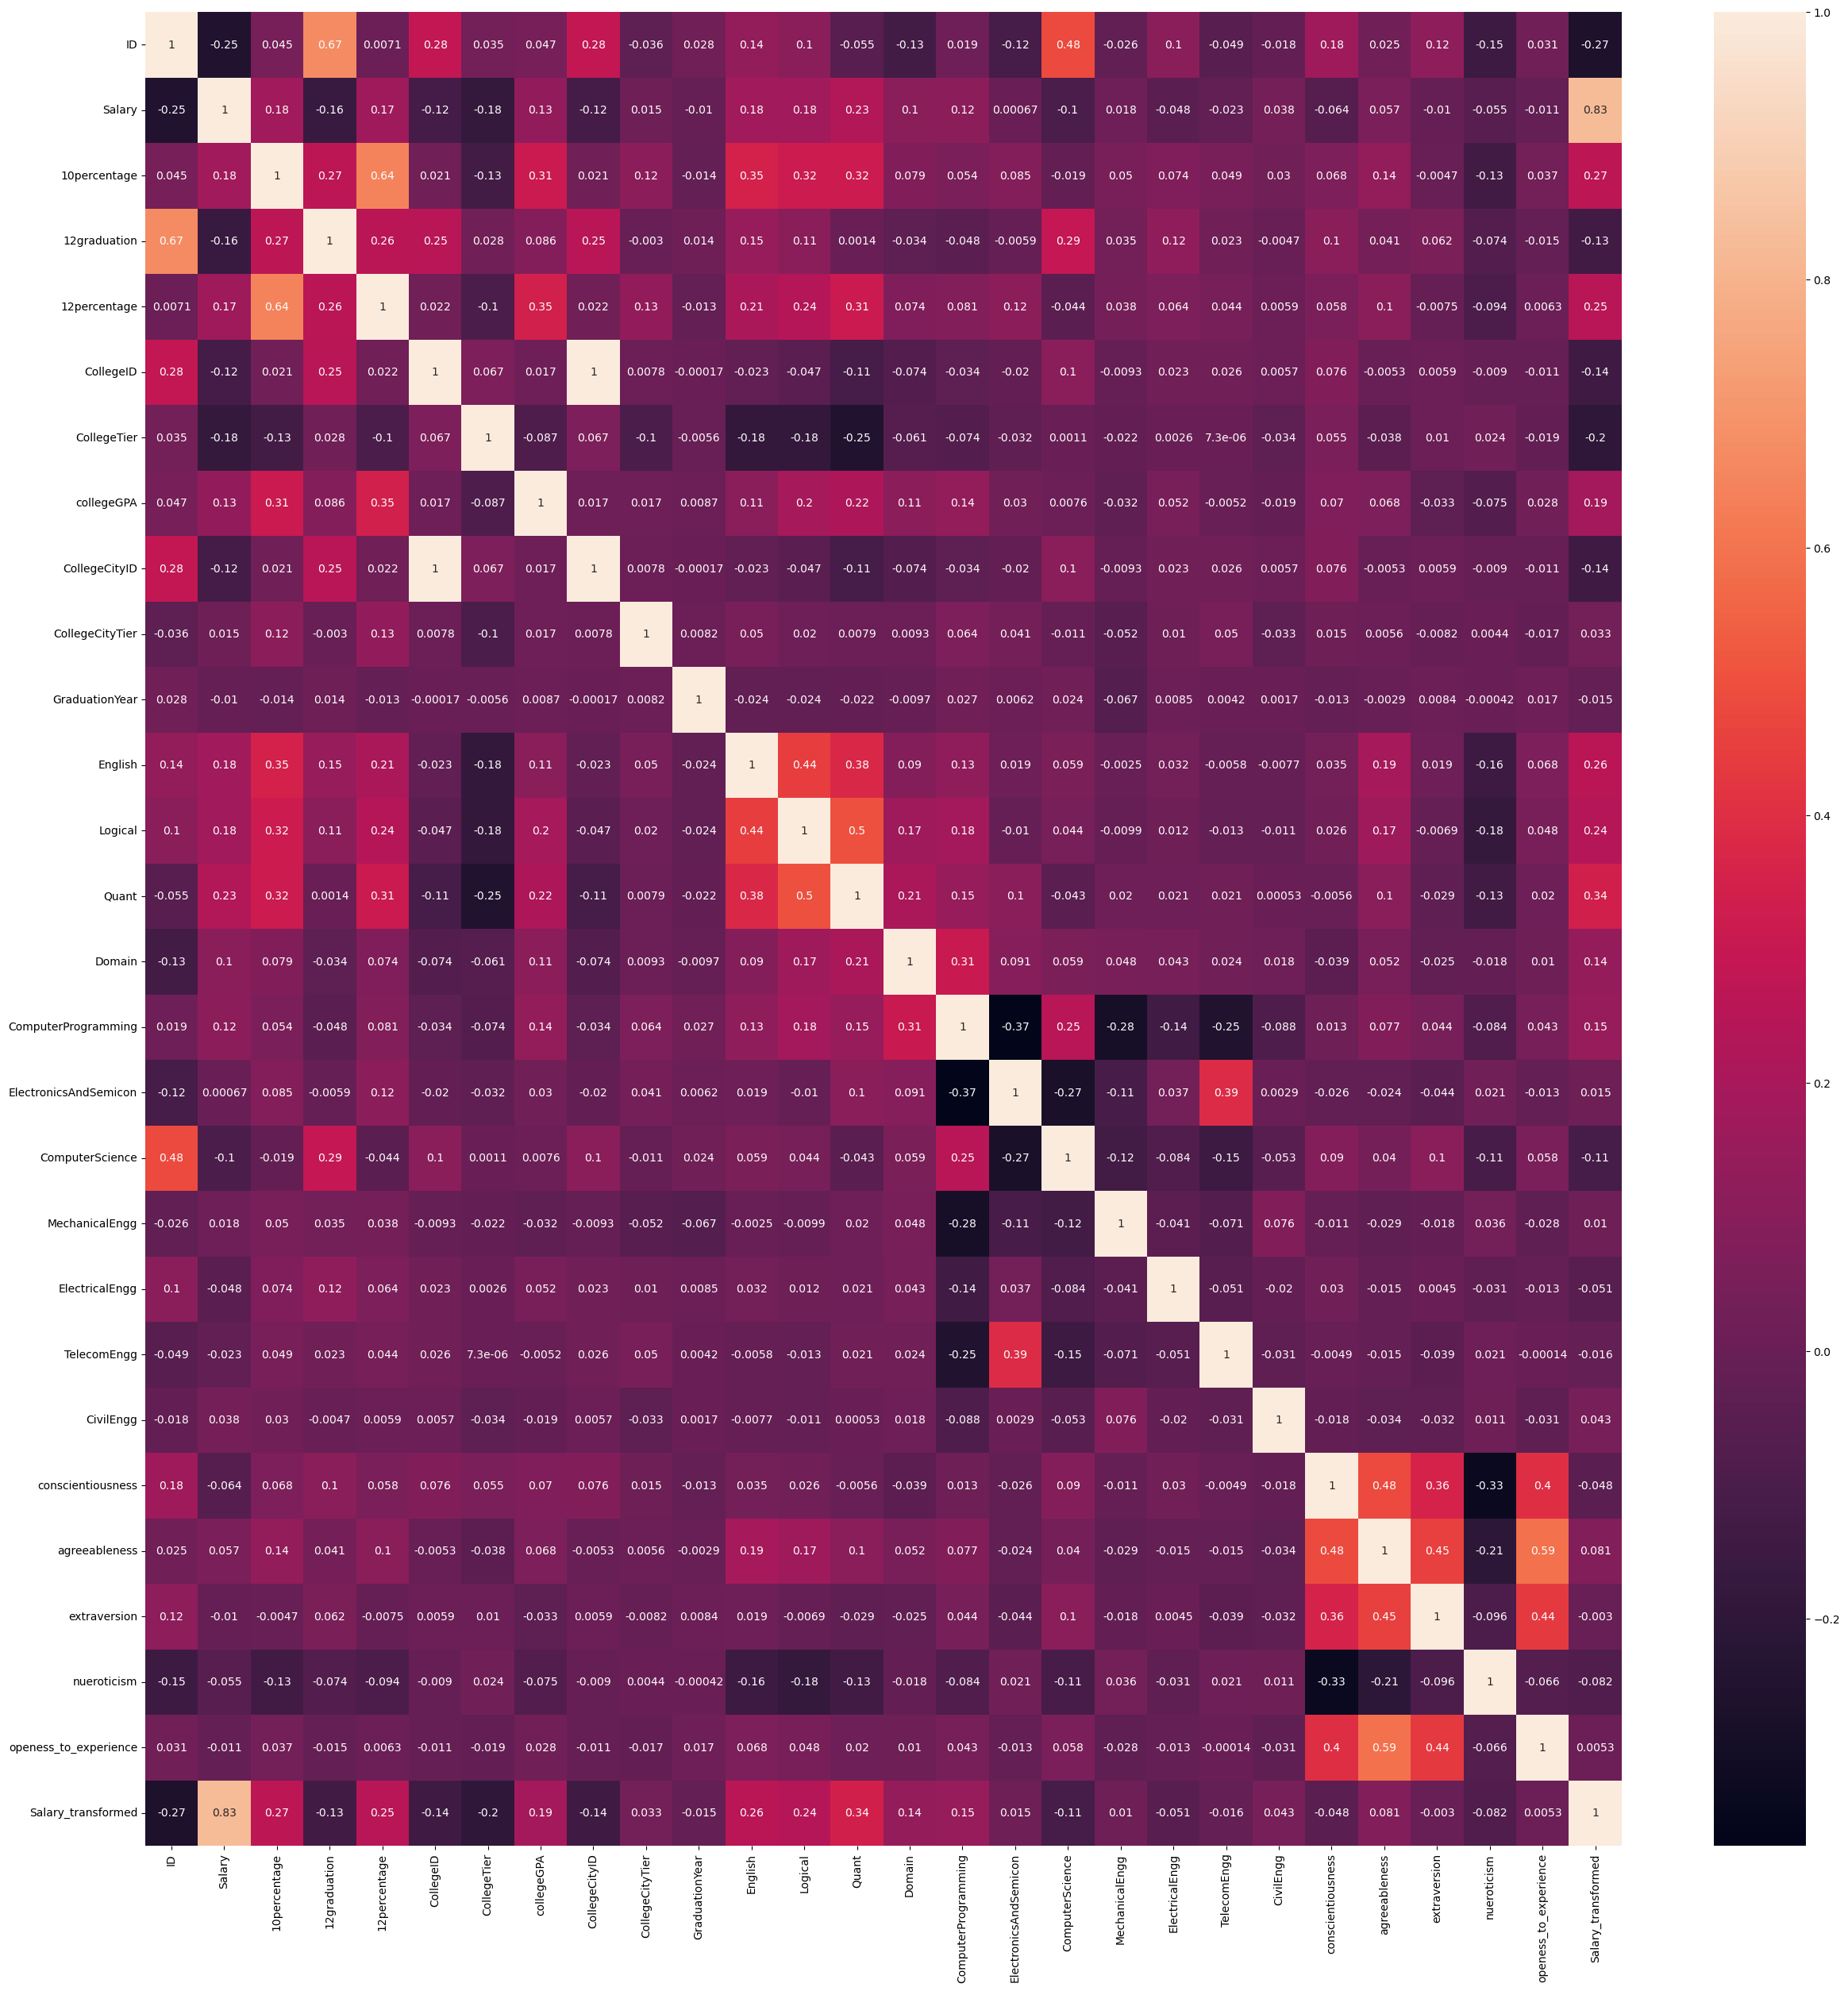

In [47]:
plt.figure(figsize=(30,30))
sns.heatmap(s,annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


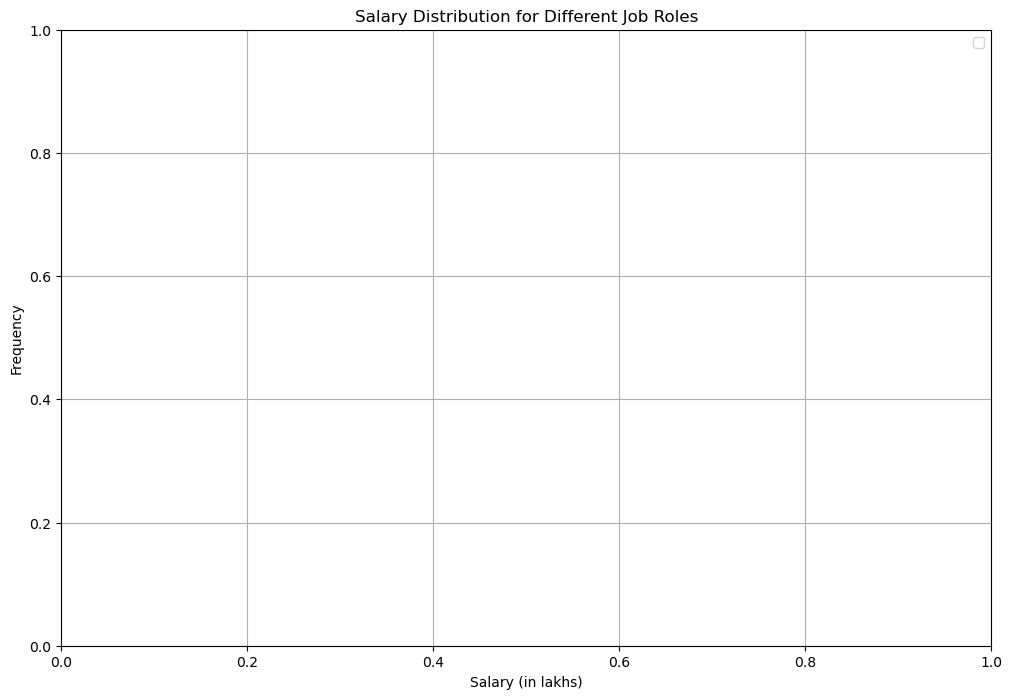

In [103]:


df = pd.read_csv("data.csv")


job_roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_data = df[df['Designation'].isin(job_roles)]


grouped_data = filtered_data.groupby('Designation')['Salary']

plt.figure(figsize=(12, 8))
for job_role, group in grouped_data:
    plt.hist(group, bins=10, alpha=0.5, label=job_role)

plt.xlabel('Salary (in lakhs)')
plt.ylabel('Frequency')
plt.title('Salary Distribution for Different Job Roles')
plt.legend()
plt.grid(True)
plt.show()
 

The histogram displays the salary distribution for different job roles including Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer.

In [80]:
from scipy.stats import chi2_contingency
data = pd.read_csv('data.csv')
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
if p < alpha:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")


Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization.


Text(0, 0.5, 'Count')

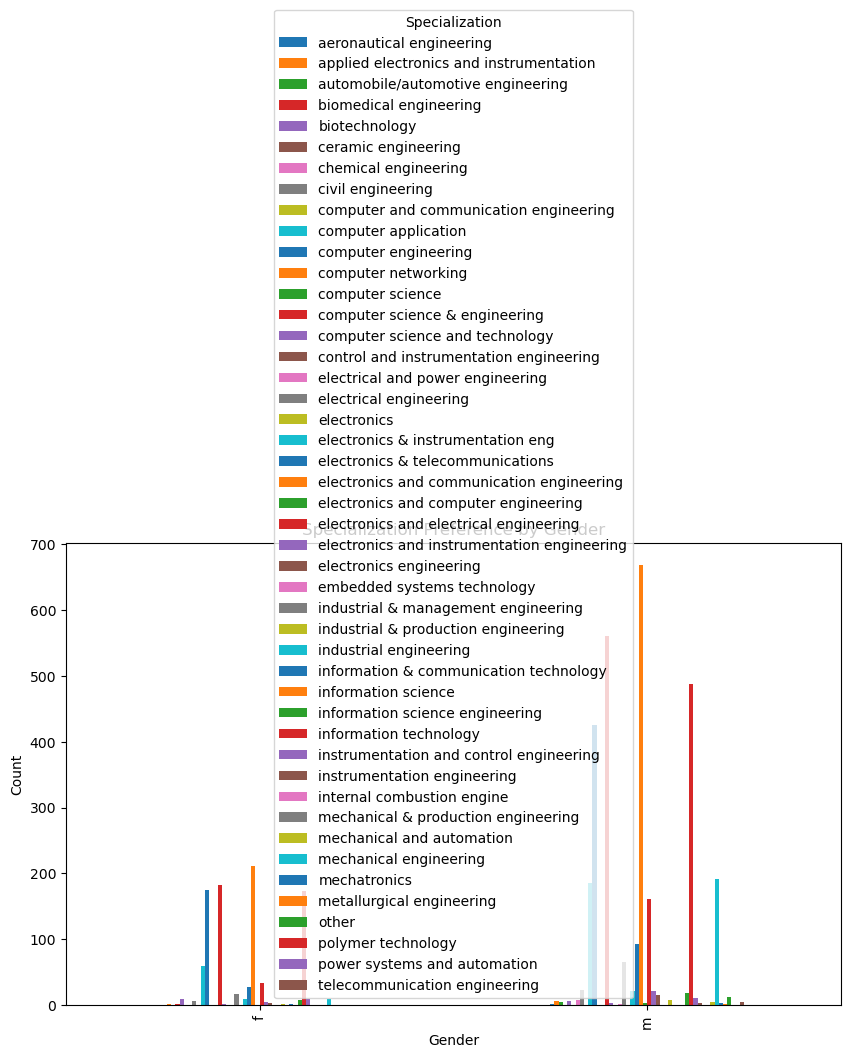

In [107]:

data = pd.read_csv('data.csv')
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Specialization Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

Gender and specialization exhibit a significant relationship, as evidenced by a chi-square statistic of 104.47 and a p-value of approximately 1.25e-06.




# CONCLUSION


Based on the exploratory data analysis (EDA) conducted on the Aspiring Mind Employment Outcome 2015 (AMCAT) dataset, several key findings and conclusions can be drawn:
Salary Determinants: Cognitive skills, technical skills, personality skills, and demographic features all play significant roles in influencing salary outcomes for engineering graduates. Specifically, higher standardized scores in these areas tend to correlate with higher salaries.
Distribution of Variables: The distribution of independent variables, including cognitive, technical, and personality skills, as well as demographic features, varies within the dataset. Understanding these distributions is crucial for identifying potential predictors of salary outcomes.
Patterns and Trends: Various patterns and trends within the dataset may impact salary outcomes. These could include differences in salary based on job titles, locations, or specific demographic characteristics.
Relationships with Salary: Exploring relationships between independent variables and salary reveals potential predictors of salary outcomes. Certain skills or demographic factors may have stronger correlations with salary than others.
Data Preprocessing Needs: Detecting missing values, outliers, or anomalies is essential for data preprocessing. Addressing these issues ensures the reliability and accuracy of subsequent analyses and predictions.
Visualization for Insights: Visualizing the data facilitates better understanding and interpretation of key findings. Graphical representations help stakeholders identify trends, patterns, and relationships more effectively.
Relevance of Variables: Determining which variables are most relevant for predicting salary outcomes is crucial. This insight guides further investigation or feature engineering to enhance predictive models.
Actionable Insights: The insights gained from the dataset can be utilized by educational institutions, recruiters, and policymakers to enhance employment outcomes for engineering graduates. This may involve tailoring educational programs, refining recruitment strategies, or implementing policies to support graduates in their career endeavors.
